In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Carga del dataset

In [26]:
internet = pd.read_excel(r"E:\Repositorios y bases de datos\Henry DS\a_Proyecto individual 2- LABS - Henry\archivos_originales\Internet.xlsx", sheet_name=None)

Carga de las hojas de la base de datos obligatoria

In [27]:
acc_vel_loc_sinrangos = internet['Acc_vel_loc_sinrangos'] 
velocidad_sin_rangos = internet['Velocidad_sin_Rangos'] 
velocidad_prom_por_prov = internet['Velocidad % por prov'] 
totales_vmd = internet['Totales VMD']
accesos_tecnologia_localidad = internet['Accesos_tecnologia_localidad'] 
totales_accesos_por_tecnología = internet['Totales Accesos Por Tecnología'] 
accesos_por_tecnología = internet['Accesos Por Tecnología'] 
dial_baft = internet['Dial-BAf'] 
totales_dial_baf = internet['Totales Dial-BAf'] 
penetracion_poblacion = internet['Penetración-poblacion']
penetracion_hogares = internet['Penetracion-hogares'] 
penetracion_totales = internet['Penetracion-totales'] 
totales_accesos_por_velocidad = internet['Totales Accesos por velocidad'] 
accesos_por_velocidad = internet['Accesos por velocidad'] 
ingresos = internet['Ingresos'] 


In [6]:
import os
import pandas as pd

# Ruta donde se guarda
ruta = r"E:\Repositorios y bases de datos\Henry DS\a_Proyecto individual 2- LABS - Henry\archivos_para_powerbi"


#os.makedirs(ruta, exist_ok=True)


dataframes_a_guardar = {
    'acc_vel_loc_sinrangos': acc_vel_loc_sinrangos,
    'velocidad_sin_rangos': velocidad_sin_rangos,
    'velocidad_prom_por_prov': velocidad_prom_por_prov,
    'totales_vmd': totales_vmd,
    'accesos_tecnologia_localidad': accesos_tecnologia_localidad,
    'totales_accesos_por_tecnología': totales_accesos_por_tecnología,
    'accesos_por_tecnología': accesos_por_tecnología,
    'dial_baft': dial_baft,
    'totales_dial_baf': totales_dial_baf,
    'penetracion_poblacion': penetracion_poblacion,
    'penetracion_hogares': penetracion_hogares,
    'penetracion_totales': penetracion_totales,
    'totales_accesos_por_velocidad': totales_accesos_por_velocidad,
    'accesos_por_velocidad': accesos_por_velocidad,
    'ingresos': ingresos
}

# Guardar cada DataFrame como un archivo CSV
for nombre, df in dataframes_a_guardar.items():
    df.to_csv(f"{ruta}/{nombre}.csv", index=False)


## ETL

1) Acceso velocidad por localidad sin rangos

In [23]:
# Muestra de las primeras filas
print("Primeras filas del DataFrame:")
display(acc_vel_loc_sinrangos.head())

# Información
print("\nInformación del DataFrame:")
acc_vel_loc_sinrangos.info()

# Estadística descriptiva
print("\nEstadísticas descriptivas:")
display(acc_vel_loc_sinrangos.describe())

# Valores nulos
valores_nulos = acc_vel_loc_sinrangos.isnull().sum()
print("\nValores nulos en cada columna:")
print(valores_nulos[valores_nulos > 0])  

# Duplicados
filas_duplicadas = acc_vel_loc_sinrangos.duplicated()
if filas_duplicadas.any():
    print("\nFilas duplicadas encontradas:")
    display(acc_vel_loc_sinrangos[filas_duplicadas])
else:
    print("\nNo se encontraron filas duplicadas.")


Primeras filas del DataFrame:


,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,540 Mbps,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,2.0,NaN,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Columns: 136 entries, Provincia to 1024 Mbps
dtypes: float64(132), object(4)
memory usage: 3.2+ MB

Estadísticas descriptivas:


,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,"1,5 Mbps",2 Mbps,"2,2 Mbps","2,5 Mbps",...,540 Mbps,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps
count,877.000000,37.000000,642.000000,526.000000,284.000000,889.000000,15.000000,686.000000,1.0,5.000000,...,1.0,154.000000,1.0,3.0,4.00000,1.0,1.0,17.000000,418.000000,1.0
mean,337.049031,2.891892,44.361371,2.131179,39.588028,68.052868,132.533333,101.804665,18.0,130.400000,...,89.0,152.136364,5.0,1.0,163.25000,1.0,110.0,3.352941,593.188995,1.0
std,2305.905335,5.733836,1020.505642,4.731243,118.563946,207.467995,291.222268,277.944787,NaN,195.566613,...,NaN,419.594218,NaN,0.0,268.44537,NaN,NaN,5.700232,3373.293229,NaN
min,-2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,7.000000,1.000000,18.0,1.000000,...,89.0,1.000000,5.0,1.0,1.00000,1.0,110.0,1.000000,1.000000,1.0
25%,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,31.000000,4.000000,18.0,25.000000,...,89.0,20.250000,5.0,1.0,10.75000,1.0,110.0,1.000000,14.250000,1.0
50%,8.000000,1.000000,1.000000,1.000000,9.500000,11.000000,47.000000,21.000000,18.0,40.000000,...,89.0,43.000000,5.0,1.0,44.50000,1.0,110.0,2.000000,135.500000,1.0
75%,72.000000,2.000000,2.000000,1.000000,28.000000,44.000000,75.000000,77.000000,18.0,114.000000,...,89.0,107.000000,5.0,1.0,197.00000,1.0,110.0,3.000000,485.250000,1.0
max,57702.000000,31.000000,25856.000000,61.000000,1307.000000,3237.000000,1170.000000,3530.000000,18.0,472.000000,...,89.0,3292.000000,5.0,1.0,563.00000,1.0,110.0,25.000000,67156.000000,1.0



Valores nulos en cada columna:
Otros         2189
0,256 Mbps    3029
0,5 Mbps      2424
0,512 Mbps    2540
0,75 Mbps     2782
              ... 
850 Mbps      3065
900 Mbps      3065
999 Mbps      3049
1000 Mbps     2648
1024 Mbps     3065
Length: 132, dtype: int64

No se encontraron filas duplicadas.


Dada la cantidad de valores nulos en este dataframe, el mismo no será utilizado.

2) Velocidad sin rangos

In [28]:
# Muestra de las primeras filas
print("Primeras filas del DataFrame:")
display(velocidad_sin_rangos.head())

# Información
print("\nInformación del DataFrame:")
velocidad_sin_rangos.info()

# Estadística descriptiva
print("\nEstadísticas descriptivas:")
display(velocidad_sin_rangos.describe())

# Valores nulos
valores_nulos = velocidad_sin_rangos.isnull().sum()
print("\nValores nulos en cada columna:")
print(valores_nulos[valores_nulos > 0])  

# Duplicados
filas_duplicadas = velocidad_sin_rangos.duplicated()
if filas_duplicadas.any():
    print("\nFilas duplicadas encontradas:")
    display(velocidad_sin_rangos[filas_duplicadas])
else:
    print("\nNo se encontraron filas duplicadas.")


Primeras filas del DataFrame:


,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2023.0,4.0,Buenos Aires,93351.0,19.0,0.0,0.0,26703.0,187.0,4611.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023.0,4.0,Capital Federal,0.0,31.0,0.0,0.0,451.0,34.0,1307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023.0,4.0,Catamarca,77.0,0.0,0.0,0.0,34.0,37.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023.0,4.0,Chaco,4040.0,0.0,0.0,0.0,234.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023.0,4.0,Chubut,16589.0,8.0,0.0,0.0,69.0,34.0,836.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Columns: 193 entries, Año to 10000 Mbps
dtypes: float64(191), int64(1), object(1)
memory usage: 906.3+ KB

Estadísticas descriptivas:


,Año,Trimestre,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,2020.360000,2.560000,9645.786667,3.435000,4.125000,2.035000,2283.281667,40.308333,1177.288333,4805.973333,...,7.180000,0.033333,1.891667,0.113333,0.061667,0.006667,0.056667,0.165000,0.013333,0.026667
std,1.809934,1.135142,17026.304860,10.816535,30.209774,14.903488,16188.516615,70.334473,4763.779933,7445.000686,...,78.243195,0.816497,20.652865,1.231401,0.734004,0.081445,0.617055,1.470162,0.162890,0.325780
min,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,2.000000,581.500000,0.000000,0.000000,0.000000,20.750000,0.000000,0.000000,704.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.000000,3.000000,4209.500000,0.000000,0.000000,0.000000,47.000000,14.000000,1.500000,2172.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2022.000000,4.000000,12772.750000,1.000000,0.000000,0.000000,82.250000,59.250000,318.000000,5381.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2023.000000,4.000000,122762.000000,102.000000,225.000000,111.000000,238902.000000,609.000000,35185.000000,49473.000000,...,860.000000,20.000000,227.000000,15.000000,9.000000,1.000000,8.000000,18.000000,2.000000,4.000000



Valores nulos en cada columna:
Año           1
Trimestre     1
Provincia     1
Otros         1
0,256 Mbps    1
             ..
5125 Mbps     1
6000 Mbps     1
7000 Mbps     1
8000 Mbps     1
10000 Mbps    1
Length: 192, dtype: int64

No se encontraron filas duplicadas.


Creación de boxplot para evaluar, según outliers presentes, cómo rellenar los faltantes

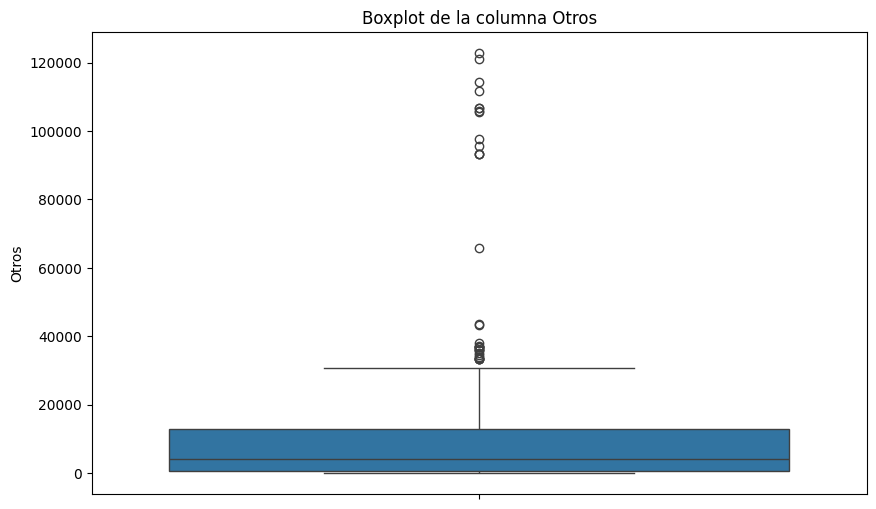

In [29]:
# Crea una copia del DataFrame para trabajar
velocidad_sin_rangos = velocidad_sin_rangos.copy()

# Genera el boxplot vertical para la columna 'Otros'
plt.figure(figsize=(10, 6))
sns.boxplot(y=velocidad_sin_rangos['Otros'])
plt.title('Boxplot de la columna Otros')
plt.ylabel('Otros')
plt.show()

El gráfico presenta una distribución asimétrica: La caja (que representa el 50% central de los datos) está muy comprimida cerca de la parte inferior del gráfico, lo que indica una fuerte asimetría positiva.
Hay muchos valores atípicos, varios puntos por encima de la caja. Algunos llegan hasta 120,000, lo que sugiere que hay algunos casos con valores extremadamente altos.
La mediana es baja, indicando que al menos el 50% de los valores son bastante bajos.
Hay una gran diferencia entre los valores más bajos y los más altos, con la mayoría de los datos concentrados en la parte inferior y algunos valores extendiéndose mucho más arriba.
El bigote superior es muy largo, lo que indica una gran variabilidad en los valores más altos que no se consideran atípicos.
Por tanto, la distribución está muy sesgada, con la mayoría de los valores concentrados en la parte baja, pero con algunos valores extremadamente altos que extienden el rango considerablemente.

Valores nulos a la mediana

In [41]:
# Filtra solo las columnas numéricas
numeric_cols = velocidad_sin_rangos.select_dtypes(include=['float64', 'int64']).columns

# Reemplaza nulos con la mediana de las columnas numéricas
velocidad_sin_rangos[numeric_cols] = velocidad_sin_rangos[numeric_cols].fillna(velocidad_sin_rangos[numeric_cols].median())

# Verifica que no queden valores nulos y mostrar solo columnas numéricas
print(velocidad_sin_rangos[numeric_cols].isnull().sum())


Año           0
Trimestre     0
Otros         0
0,256 Mbps    0
0,375 Mbps    0
             ..
5125 Mbps     0
6000 Mbps     0
7000 Mbps     0
8000 Mbps     0
10000 Mbps    0
Length: 192, dtype: int64


3) Velocidad promedio por provincia

In [25]:
# Muestra de las primeras filas
print("Primeras filas del DataFrame:")
display(velocidad_prom_por_prov.head())

# Información
print("\nInformación del DataFrame:")
velocidad_prom_por_prov.info()

# Estadística descriptiva
print("\nEstadísticas descriptivas:")
display(velocidad_prom_por_prov.describe())

# Valores nulos
valores_nulos = velocidad_prom_por_prov.isnull().sum()
print("\nValores nulos en cada columna:")
print(valores_nulos[valores_nulos > 0])  

# Duplicados
filas_duplicadas = velocidad_prom_por_prov.duplicated()
if filas_duplicadas.any():
    print("\nFilas duplicadas encontradas:")
    display(velocidad_prom_por_prov[filas_duplicadas])
else:
    print("\nNo se encontraron filas duplicadas.")


Primeras filas del DataFrame:


,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2023,4,Buenos Aires,158.49
1,2023,4,Capital Federal,234.44
2,2023,4,Catamarca,89.40
3,2023,4,Chaco,107.14
4,2023,4,Chubut,20.29



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     960 non-null    int64  
 1   Trimestre               960 non-null    int64  
 2   Provincia               960 non-null    object 
 3   Mbps (Media de bajada)  960 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.1+ KB

Estadísticas descriptivas:


,Año,Trimestre,Mbps (Media de bajada)
count,960.000000,960.000000,960.000000
mean,2018.500000,2.500000,21.615685
std,2.873778,1.118617,29.340345
min,2014.000000,1.000000,2.573729
25%,2016.000000,1.750000,4.685122
50%,2018.500000,2.500000,8.885746
75%,2021.000000,3.250000,25.682270
max,2023.000000,4.000000,234.440000



Valores nulos en cada columna:
Series([], dtype: int64)

No se encontraron filas duplicadas.


4) Totales VDM

In [26]:
# Muestra de las primeras filas
print("Primeras filas del DataFrame:")
display(totales_vmd.head())

# Información
print("\nInformación del DataFrame:")
totales_vmd.info()

# Estadística descriptiva
print("\nEstadísticas descriptivas:")
display(totales_vmd.describe())

# Valores nulos
valores_nulos = totales_vmd.isnull().sum()
print("\nValores nulos en cada columna:")
print(valores_nulos[valores_nulos > 0])  

# Duplicados
filas_duplicadas = totales_vmd.duplicated()
if filas_duplicadas.any():
    print("\nFilas duplicadas encontradas:")
    display(totales_vmd[filas_duplicadas])
else:
    print("\nNo se encontraron filas duplicadas.")


Primeras filas del DataFrame:


,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2023,4,139.04,Oct-Dic 2023
1,2023,3,129.67,Jul-Sept 2023
2,2023,2,123.95,Abr-Jun 2023
3,2023,1,110.50,Ene-Mar 2023
4,2022,4,106.56,Oct-Dic 2022



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     40 non-null     int64  
 1   Trimestre               40 non-null     int64  
 2   Mbps (Media de bajada)  40 non-null     float64
 3   Trimestre.1             40 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB

Estadísticas descriptivas:


,Año,Trimestre,Mbps (Media de bajada)
count,40.000000,40.000000,40.000000
mean,2018.500000,2.500000,34.341500
std,2.908872,1.132277,38.280484
min,2014.000000,1.000000,3.617127
25%,2016.000000,1.750000,5.809965
50%,2018.500000,2.500000,16.665000
75%,2021.000000,3.250000,46.337500
max,2023.000000,4.000000,139.040000



Valores nulos en cada columna:
Series([], dtype: int64)

No se encontraron filas duplicadas.


5) Acceso a tecnología por localidad

In [27]:
# Muestra de las primeras filas
print("Primeras filas del DataFrame:")
display(accesos_tecnologia_localidad.head())

# Información
print("\nInformación del DataFrame:")
accesos_tecnologia_localidad.info()

# Estadística descriptiva
print("\nEstadísticas descriptivas:")
display(accesos_tecnologia_localidad.describe())

# Valores nulos
valores_nulos = accesos_tecnologia_localidad.isnull().sum()
print("\nValores nulos en cada columna:")
print(valores_nulos[valores_nulos > 0])  

# Duplicados
filas_duplicadas = accesos_tecnologia_localidad.duplicated()
if filas_duplicadas.any():
    print("\nFilas duplicadas encontradas:")
    display(accesos_tecnologia_localidad[filas_duplicadas])
else:
    print("\nNo se encontraron filas duplicadas.")


Primeras filas del DataFrame:


,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,756,4600,0,3,0,742,0,726,6827
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,496,16,0,0,185,1479
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3076 non-null   object
 1   Partido        3076 non-null   object
 2   Localidad      3076 non-null   object
 3   Link Indec     3076 non-null   object
 4   ADSL           3076 non-null   int64 
 5   CABLEMODEM     3076 non-null   int64 
 6   DIAL UP        3076 non-null   int64 
 7   FIBRA OPTICA   3076 non-null   int64 
 8   OTROS          3076 non-null   int64 
 9   SATELITAL      3076 non-null   int64 
 10  WIMAX          3076 non-null   int64 
 11  WIRELESS       3076 non-null   int64 
 12  Total general  3076 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 312.5+ KB

Estadísticas descriptivas:


,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
count,3076.000000,3.076000e+03,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3.076000e+03
mean,271.908322,1.957910e+03,3.833875,1270.540637,57.809818,0.972692,0.711313,190.429129,3.754116e+03
std,1550.899791,2.315212e+04,43.153830,8467.801469,793.944335,13.648046,15.093030,712.357143,3.119100e+04
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.700000e+01
50%,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,28.000000,1.675000e+02
75%,78.250000,8.500000e+00,0.000000,152.000000,0.000000,1.000000,0.000000,127.000000,1.048250e+03
max,58700.000000,1.198835e+06,2050.000000,269623.000000,27703.000000,742.000000,444.000000,19906.000000,1.474367e+06



Valores nulos en cada columna:
Series([], dtype: int64)

No se encontraron filas duplicadas.


6) Total acceso por tecnología

In [28]:
# Muestra de las primeras filas
print("Primeras filas del DataFrame:")
display(totales_accesos_por_tecnología.head())

# Información
print("\nInformación del DataFrame:")
totales_accesos_por_tecnología.info()

# Estadística descriptiva
print("\nEstadísticas descriptivas:")
display(totales_accesos_por_tecnología.describe())

# Valores nulos
valores_nulos = totales_accesos_por_tecnología.isnull().sum()
print("\nValores nulos en cada columna:")
print(valores_nulos[valores_nulos > 0])  

# Duplicados
filas_duplicadas = totales_accesos_por_tecnología.duplicated()
if filas_duplicadas.any():
    print("\nFilas duplicadas encontradas:")
    display(totales_accesos_por_tecnología[filas_duplicadas])
else:
    print("\nNo se encontraron filas duplicadas.")


Primeras filas del DataFrame:


,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
1,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
2,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023
3,2023,1,1204417,6002582,3243411,576647,214838,11241895,Ene-Mar 2023
4,2022,4,1315373,6037457,3060575,572969,221740,11208114,Oct-Dic 2022



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           40 non-null     int64 
 1   Trimestre     40 non-null     int64 
 2   ADSL          40 non-null     int64 
 3   Cablemodem    40 non-null     int64 
 4   Fibra óptica  40 non-null     int64 
 5   Wireless      40 non-null     int64 
 6   Otros         40 non-null     int64 
 7   Total         40 non-null     int64 
 8   Periodo       40 non-null     object
dtypes: int64(8), object(1)
memory usage: 2.9+ KB

Estadísticas descriptivas:


,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,40.000000,40.000000,4.000000e+01,4.000000e+01,4.000000e+01,40.000000,40.000000,4.000000e+01
mean,2018.500000,2.500000,2.791887e+06,4.359240e+06,1.081302e+06,289710.900000,154847.925000,8.676987e+06
std,2.908872,1.132277,1.027693e+06,1.308010e+06,1.179722e+06,197048.992979,82678.927051,1.655946e+06
min,2014.000000,1.000000,8.363900e+05,2.407330e+06,1.391870e+05,70749.000000,54300.000000,6.398398e+06
25%,2016.000000,1.750000,2.001598e+06,3.102459e+06,1.694705e+05,85307.250000,69048.000000,7.187732e+06
50%,2018.500000,2.500000,3.230908e+06,4.374635e+06,5.125560e+05,270359.000000,172437.000000,8.560895e+06
75%,2021.000000,3.250000,3.716772e+06,5.687862e+06,1.495696e+06,480829.750000,238176.500000,9.918698e+06
max,2023.000000,4.000000,3.803024e+06,6.073426e+06,3.908183e+06,585760.000000,265328.000000,1.154766e+07



Valores nulos en cada columna:
Series([], dtype: int64)

No se encontraron filas duplicadas.


7) Acceso por tecnología

In [5]:
# Muestra de las primeras filas
print("Primeras filas del DataFrame:")
display(accesos_por_tecnología.head())

# Información
print("\nInformación del DataFrame:")
accesos_por_tecnología.info()

# Estadística descriptiva
print("\nEstadísticas descriptivas:")
display(accesos_por_tecnología.describe())

# Valores nulos
valores_nulos = accesos_por_tecnología.isnull().sum()
print("\nValores nulos en cada columna:")
print(valores_nulos[valores_nulos > 0])  

# Duplicados
filas_duplicadas = accesos_por_tecnología.duplicated()
if filas_duplicadas.any():
    print("\nFilas duplicadas encontradas:")
    display(accesos_por_tecnología[filas_duplicadas])
else:
    print("\nNo se encontraron filas duplicadas.")


Primeras filas del DataFrame:


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2023,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0
1,2023,4,Capital Federal,58700.0,1198835.0,182520.0,4492.0,29820.0,1474367.0
2,2023,4,Catamarca,6669.0,11016.0,55437.0,1384.0,81.0,74587.0
3,2023,4,Chaco,14000.0,60277.0,62301.0,8404.0,2404.0,147386.0
4,2023,4,Chubut,26306.0,77217.0,26174.0,30543.0,9930.0,170170.0



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           961 non-null    object 
 1   Trimestre     961 non-null    object 
 2   Provincia     960 non-null    object 
 3   ADSL          960 non-null    float64
 4   Cablemodem    960 non-null    float64
 5   Fibra óptica  960 non-null    float64
 6   Wireless      960 non-null    float64
 7   Otros         960 non-null    float64
 8   Total         960 non-null    float64
dtypes: float64(6), object(3)
memory usage: 67.8+ KB

Estadísticas descriptivas:


,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,9.600000e+02,9.600000e+02,9.600000e+02,960.00000,960.000000,9.600000e+02
mean,1.171007e+05,1.816350e+05,4.428212e+04,12071.28750,6451.996875,3.615411e+05
std,2.411026e+05,4.461057e+05,1.681546e+05,20544.30774,11192.518329,7.778954e+05
min,3.296000e+03,0.000000e+00,0.000000e+00,0.00000,2.000000,1.255700e+04
25%,2.123025e+04,1.054450e+04,3.470000e+02,676.00000,330.000000,5.900025e+04
50%,4.547550e+04,3.967000e+04,2.541000e+03,4947.00000,1881.000000,1.111385e+05
75%,9.190500e+04,7.549325e+04,2.347675e+04,13694.25000,7278.750000,1.883518e+05
max,1.586343e+06,2.797700e+06,1.784593e+06,138405.00000,73415.000000,5.011620e+06



Valores nulos en cada columna:
Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64

No se encontraron filas duplicadas.


Creación de boxplot para evaluar, según outliers presentes, cómo rellenar los faltantes

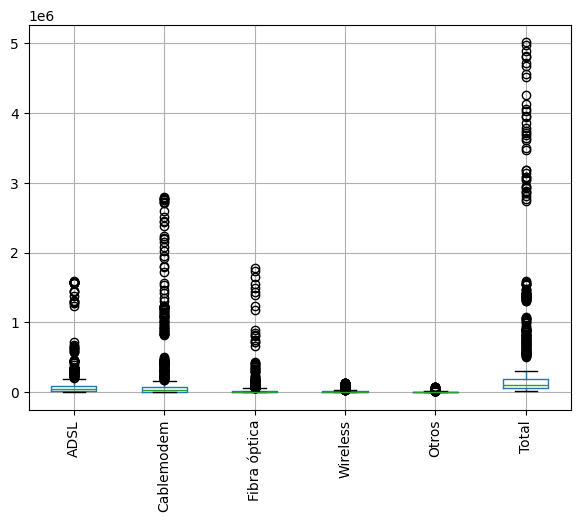

In [7]:
accesos_por_tecnología.boxplot(figsize=(7, 5))
plt.xticks(rotation=90)
plt.show()

Todas las categorías muestran una fuerte asimetría, con cajas comprimidas cerca de la parte inferior y muchos valores atípicos por encima. Hay numerosos puntos por encima de las cajas en todas las categorías, lo que indica la presencia de outliers o simplemente valores inusuales pero no errores necesariamente. 
Cablemodem y Fibra óptica parecen tener la mayor variabilidad, con valores atípicos que se extienden más alto que otras categorías.
Las medianas son relativamente bajas en todas las categorías, lo que sugiere que la mayoría de los valores son bajos.
Cablemodem parece ser la categoría con valores más altos después del Total, seguida por Fibra óptica y ADSL.
Hay una gran variabilidad en los datos de conexiones a Internet, con la mayoría de los valores concentrados en la parte baja de la distribución, pero con algunos valores extremadamente altos en todas las categorías. Esto podría reflejar diferencias significativas entre regiones.

Valores nulos a la mediana

In [11]:
# Crea una copia del DataFrame para trabajar
accesos_por_tecnología = accesos_por_tecnología.copy()

# Define las columnas que queremos llenar con la mediana
columns_to_fill = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']

# Llena los valores nulos con la mediana de su grupo correspondiente
for col in columns_to_fill:
    # Reemplaza nulos en el grupo por la mediana del grupo
    accesos_por_tecnología[col] = accesos_por_tecnología.groupby(['Año', 'Trimestre', 'Provincia'])[col].transform(lambda x: x.fillna(x.median()))

    # Reemplaza cualquier nulo restante por la mediana general de la columna
    accesos_por_tecnología[col] = accesos_por_tecnología[col].fillna(df[col].median())

# Muestra los resultados
print(accesos_por_tecnología.info())
print(accesos_por_tecnología.describe())
print("Valores nulos después del reemplazo:\n", accesos_por_tecnología.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           961 non-null    object 
 1   Trimestre     961 non-null    object 
 2   Provincia     960 non-null    object 
 3   ADSL          962 non-null    float64
 4   Cablemodem    962 non-null    float64
 5   Fibra óptica  962 non-null    float64
 6   Wireless      962 non-null    float64
 7   Otros         962 non-null    float64
 8   Total         962 non-null    float64
dtypes: float64(6), object(3)
memory usage: 67.8+ KB
None
               ADSL    Cablemodem  Fibra óptica       Wireless         Otros  \
count  9.620000e+02  9.620000e+02  9.620000e+02     962.000000    962.000000   
mean   1.169518e+05  1.813398e+05  4.419534e+04   12056.476091   6442.493763   
std    2.408737e+05  4.456883e+05  1.679903e+05   20525.486520  11182.805878   
min    3.296000e+03  0.000000e+00  0.000000e+

8) DIAL baft

In [30]:
# Muestra de las primeras filas
print("Primeras filas del DataFrame:")
display(dial_baft.head())

# Información
print("\nInformación del DataFrame:")
dial_baft.info()

# Estadística descriptiva
print("\nEstadísticas descriptivas:")
display(dial_baft.describe())

# Valores nulos
valores_nulos = dial_baft.isnull().sum()
print("\nValores nulos en cada columna:")
print(valores_nulos[valores_nulos > 0])  

# Duplicados
filas_duplicadas = dial_baft.duplicated()
if filas_duplicadas.any():
    print("\nFilas duplicadas encontradas:")
    display(dial_baft[filas_duplicadas])
else:
    print("\nNo se encontraron filas duplicadas.")


Primeras filas del DataFrame:


,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2023,4,Buenos Aires,5005720,5900.0,5011620
1,2023,4,Capital Federal,1472317,2050.0,1474367
2,2023,4,Catamarca,74586,1.0,74587
3,2023,4,Chaco,147381,5.0,147386
4,2023,4,Chubut,169313,857.0,170170



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               960 non-null    int64  
 1   Trimestre         960 non-null    int64  
 2   Provincia         960 non-null    object 
 3   Banda ancha fija  960 non-null    int64  
 4   Dial up           958 non-null    float64
 5   Total             960 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 45.1+ KB

Estadísticas descriptivas:


,Año,Trimestre,Banda ancha fija,Dial up,Total
count,960.000000,960.000000,9.600000e+02,958.000000,9.600000e+02
mean,2018.500000,2.500000,3.606255e+05,917.538622,3.615411e+05
std,2.873778,1.118617,7.761374e+05,2311.474721,7.778954e+05
min,2014.000000,1.000000,1.219300e+04,0.000000,1.255700e+04
25%,2016.000000,1.750000,5.892325e+04,5.000000,5.900025e+04
50%,2018.500000,2.500000,1.104735e+05,137.000000,1.111385e+05
75%,2021.000000,3.250000,1.883502e+05,618.750000,1.883518e+05
max,2023.000000,4.000000,5.005720e+06,15229.000000,5.011620e+06



Valores nulos en cada columna:
Dial up    2
dtype: int64

No se encontraron filas duplicadas.


Creación de boxplot para evaluar, según outliers presentes, cómo rellenar los faltantes

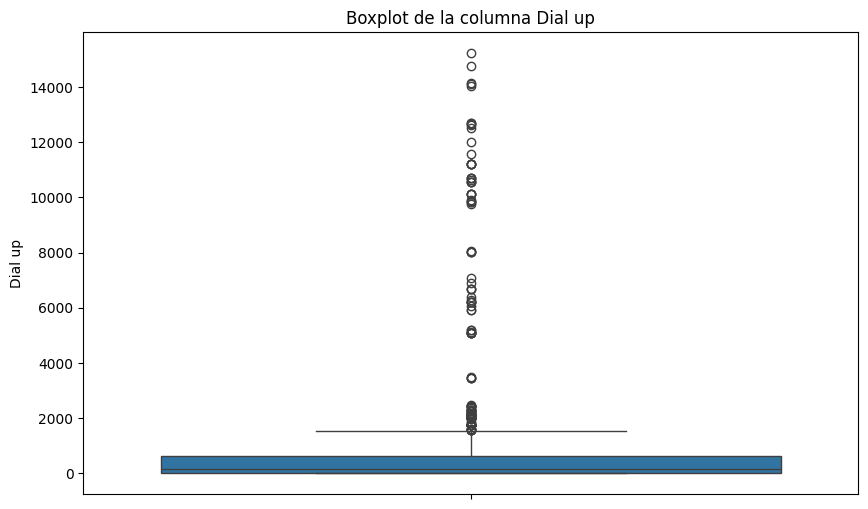

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=dial_baft['Dial up'])
plt.title('Boxplot de la columna Dial up')
plt.ylabel('Dial up')
plt.show()

La caja, que representa el 50% central de los datos, está comprimida en la parte inferior del gráfico, indicando una distribución muy sesgada hacia la derecha.
La mediana está muy cerca de la parte inferior, sugiriendo que al menos el 50% de los valores son bastante bajos.
Hay numerosos puntos por encima de la caja, representando outliers. Estos se extienden hasta aproximadamente 15,000 en la escala vertical.
Existe una gran diferencia entre los valores más bajos (cerca de 0) y los más altos (alrededor de 15,000).
La mayoría de los datos parecen estar concentrados en valores bajos, probablemente por debajo de 2,000.
Esta distribución sugiere que la mayoría de las conexiones "Dial up" tienen valores bajos, pero hay algunas con valores mucho más altos, posiblemente representando casos excepcionales.

Reemplazo de faltantes con la mediana

In [15]:
# Reemplaza los valores nulos con la mediana correspondiente
dial_baft['Dial up'] = dial_baft['Dial up'].fillna(dial_baft['Dial up'].median())

# Verifica que no queden valores nulos
print(dial_baft.isnull().sum())


Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             0
Total               0
dtype: int64


9) Totales DIAL baft

In [31]:
# Muestra de las primeras filas
print("Primeras filas del DataFrame:")
display(totales_dial_baf.head())

# Información
print("\nInformación del DataFrame:")
totales_dial_baf.info()

# Estadística descriptiva
print("\nEstadísticas descriptivas:")
display(totales_dial_baf.describe())

# Valores nulos
valores_nulos = totales_dial_baf.isnull().sum()
print("\nValores nulos en cada columna:")
print(valores_nulos[valores_nulos > 0])  

# Duplicados
filas_duplicadas = totales_dial_baf.duplicated()
if filas_duplicadas.any():
    print("\nFilas duplicadas encontradas:")
    display(totales_dial_baf[filas_duplicadas])
else:
    print("\nNo se encontraron filas duplicadas.")


Primeras filas del DataFrame:


,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2023,4,11535868,11793,11547661,Oct-Dic 2023
1,2023,3,11395115,11793,11406908,Jul-Sept 2023
2,2023,2,11239781,12116,11251897,Abr-Jun 2023
3,2023,1,11229459,12436,11241895,Ene-Mar 2023
4,2022,4,11195668,12446,11208114,Oct-Dic 2022



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               40 non-null     int64 
 1   Trimestre         40 non-null     int64 
 2   Banda ancha fija  40 non-null     int64 
 3   Dial up           40 non-null     int64 
 4   Total             40 non-null     int64 
 5   Periodo           40 non-null     object
dtypes: int64(5), object(1)
memory usage: 2.0+ KB

Estadísticas descriptivas:


,Año,Trimestre,Banda ancha fija,Dial up,Total
count,40.000000,40.000000,4.000000e+01,40.000000,4.000000e+01
mean,2018.500000,2.500000,8.655012e+06,21975.050000,8.676987e+06
std,2.908872,1.132277,1.665017e+06,10146.937312,1.655946e+06
min,2014.000000,1.000000,6.362108e+06,9991.000000,6.398398e+06
25%,2016.000000,1.750000,7.158156e+06,12035.250000,7.187732e+06
50%,2018.500000,2.500000,8.539082e+06,21813.000000,8.560895e+06
75%,2021.000000,3.250000,9.908322e+06,29576.250000,9.918698e+06
max,2023.000000,4.000000,1.153587e+07,39324.000000,1.154766e+07



Valores nulos en cada columna:
Series([], dtype: int64)

No se encontraron filas duplicadas.


10) Penetración por población

In [32]:
# Muestra de las primeras filas
print("Primeras filas del DataFrame:")
display(penetracion_poblacion.head())

# Información
print("\nInformación del DataFrame:")
penetracion_poblacion.info()

# Estadística descriptiva
print("\nEstadísticas descriptivas:")
display(penetracion_poblacion.describe())

# Valores nulos
valores_nulos = penetracion_poblacion.isnull().sum()
print("\nValores nulos en cada columna:")
print(valores_nulos[valores_nulos > 0])  

# Duplicados
filas_duplicadas = penetracion_poblacion.duplicated()
if filas_duplicadas.any():
    print("\nFilas duplicadas encontradas:")
    display(penetracion_poblacion[filas_duplicadas])
else:
    print("\nNo se encontraron filas duplicadas.")


Primeras filas del DataFrame:


,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2023,4,Buenos Aires,27.68
1,2023,4,Capital Federal,47.80
2,2023,4,Catamarca,17.46
3,2023,4,Chaco,11.85
4,2023,4,Chubut,26.04



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       960 non-null    int64  
 1   Trimestre                 960 non-null    int64  
 2   Provincia                 960 non-null    object 
 3   Accesos por cada 100 hab  960 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.1+ KB

Estadísticas descriptivas:


,Año,Trimestre,Accesos por cada 100 hab
count,960.000000,960.000000,960.000000
mean,2018.500000,2.500000,15.394079
std,2.873778,1.118617,9.168959
min,2014.000000,1.000000,2.684669
25%,2016.000000,1.750000,8.764189
50%,2018.500000,2.500000,13.417453
75%,2021.000000,3.250000,19.657928
max,2023.000000,4.000000,52.236739



Valores nulos en cada columna:
Series([], dtype: int64)

No se encontraron filas duplicadas.


11) Penetración por hogares

In [33]:
# Muestra de las primeras filas
print("Primeras filas del DataFrame:")
display(penetracion_hogares.head())

# Información
print("\nInformación del DataFrame:")
penetracion_hogares.info()

# Estadística descriptiva
print("\nEstadísticas descriptivas:")
display(penetracion_hogares.describe())

# Valores nulos
valores_nulos = penetracion_hogares.isnull().sum()
print("\nValores nulos en cada columna:")
print(valores_nulos[valores_nulos > 0])  

# Duplicados
filas_duplicadas = penetracion_hogares.duplicated()
if filas_duplicadas.any():
    print("\nFilas duplicadas encontradas:")
    display(penetracion_hogares[filas_duplicadas])
else:
    print("\nNo se encontraron filas duplicadas.")


Primeras filas del DataFrame:


,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2023,4,Buenos Aires,80.96
1,2023,4,Capital Federal,117.02
2,2023,4,Catamarca,68.63
3,2023,4,Chaco,44.35
4,2023,4,Chubut,84.96



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           960 non-null    int64  
 1   Trimestre                     960 non-null    int64  
 2   Provincia                     960 non-null    object 
 3   Accesos por cada 100 hogares  960 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.1+ KB

Estadísticas descriptivas:


,Año,Trimestre,Accesos por cada 100 hogares
count,960.000000,960.000000,960.000000
mean,2018.500000,2.500000,51.662405
std,2.873778,1.118617,23.898192
min,2014.000000,1.000000,9.347208
25%,2016.000000,1.750000,32.856870
50%,2018.500000,2.500000,48.817167
75%,2021.000000,3.250000,65.116858
max,2023.000000,4.000000,124.061394



Valores nulos en cada columna:
Series([], dtype: int64)

No se encontraron filas duplicadas.


12) Penetración totales

In [34]:
# Muestra de las primeras filas
print("Primeras filas del DataFrame:")
display(penetracion_totales.head())

# Información
print("\nInformación del DataFrame:")
penetracion_totales.info()

# Estadística descriptiva
print("\nEstadísticas descriptivas:")
display(penetracion_totales.describe())

# Valores nulos
valores_nulos = penetracion_totales.isnull().sum()
print("\nValores nulos en cada columna:")
print(valores_nulos[valores_nulos > 0])  

# Duplicados
filas_duplicadas = penetracion_totales.duplicated()
if filas_duplicadas.any():
    print("\nFilas duplicadas encontradas:")
    display(penetracion_totales[filas_duplicadas])
else:
    print("\nNo se encontraron filas duplicadas.")


Primeras filas del DataFrame:


,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2023,4,78.56,24.66,Oct-Dic 2023
1,2023,3,77.84,24.41,Jul-Sept 2023
2,2023,2,77.02,24.14,Abr-Jun 2023
3,2023,1,77.20,24.17,Ene-Mar 2023
4,2022,4,77.21,24.15,Oct-Dic 2022



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           40 non-null     int64  
 1   Trimestre                     40 non-null     int64  
 2   Accesos por cada 100 hogares  40 non-null     float64
 3   Accesos por cada 100 hab      40 non-null     float64
 4   Periodo                       40 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.7+ KB

Estadísticas descriptivas:


,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,40.000000,40.000000,40.000000,40.000000
mean,2018.500000,2.500000,62.436404,19.319330
std,2.908872,1.132277,9.563500,3.134956
min,2014.000000,1.000000,49.545821,15.050104
25%,2016.000000,1.750000,53.636190,16.471345
50%,2018.500000,2.500000,61.947487,19.138953
75%,2021.000000,3.250000,69.574850,21.656592
max,2023.000000,4.000000,78.560000,24.660000



Valores nulos en cada columna:
Series([], dtype: int64)

No se encontraron filas duplicadas.


13) Totales accesos por velocidad

In [35]:
# Muestra de las primeras filas
print("Primeras filas del DataFrame:")
display(totales_accesos_por_velocidad.head())

# Información
print("\nInformación del DataFrame:")
totales_accesos_por_velocidad.info()

# Estadística descriptiva
print("\nEstadísticas descriptivas:")
display(totales_accesos_por_velocidad.describe())

# Valores nulos
valores_nulos = totales_accesos_por_velocidad.isnull().sum()
print("\nValores nulos en cada columna:")
print(valores_nulos[valores_nulos > 0])  

# Duplicados
filas_duplicadas = totales_accesos_por_velocidad.duplicated()
if filas_duplicadas.any():
    print("\nFilas duplicadas encontradas:")
    display(totales_accesos_por_velocidad[filas_duplicadas])
else:
    print("\nNo se encontraron filas duplicadas.")


Primeras filas del DataFrame:


,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2024,4,29708,71742,900253,978108,697232,350290,8224736,295592,11547661
1,2023,3,30274,80609,945608,998725,720084,350918,8003269,277421,11406908
2,2023,2,30827,79405,963510,1028250,734125,364730,7775095,275955,11251897
3,2023,1,31437,82048,1001553,1060321,729194,357769,7564819,414754,11241895
4,2022,4,31981,85668,1075272,1109421,765015,335573,7410902,394282,11208114



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      40 non-null     int64
 1   Trimestre                40 non-null     int64
 2   Hasta 512 kbps           40 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  40 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    40 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   40 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  40 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  40 non-null     int64
 8   Más de 30 Mbps           40 non-null     int64
 9   OTROS                    40 non-null     int64
 10  Total                    40 non-null     int64
dtypes: int64(11)
memory usage: 3.6 KB

Estadísticas descriptivas:


,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
count,40.000000,40.000000,40.0000,40.000000,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,40.000000,4.000000e+01
mean,2018.525000,2.500000,47670.6250,222986.575000,3.292524e+06,9.146983e+05,8.952789e+05,4.847302e+05,2.637241e+06,145046.600000,8.640177e+06
std,2.952509,1.132277,49981.9869,194006.387383,1.497346e+06,2.351130e+05,4.602764e+05,4.434259e+05,2.959224e+06,129164.653258,1.696189e+06
min,2014.000000,1.000000,5675.0000,28521.000000,9.002530e+05,2.891820e+05,1.011270e+05,3.450000e+02,1.159500e+04,0.000000,6.272846e+06
25%,2016.000000,1.750000,30132.5000,77489.250000,2.545490e+06,8.438092e+05,6.962432e+05,1.119172e+05,3.052150e+04,0.000000,7.144003e+06
50%,2018.500000,2.500000,36230.0000,198451.000000,3.327425e+06,9.848485e+05,8.029080e+05,4.222760e+05,8.691535e+05,165319.000000,8.560895e+06
75%,2021.000000,3.250000,41087.5000,316865.000000,4.848150e+06,1.060943e+06,1.061018e+06,6.049265e+05,4.733012e+06,237051.750000,9.918698e+06
max,2024.000000,4.000000,241713.0000,687619.000000,5.153437e+06,1.245333e+06,2.068087e+06,1.688748e+06,8.224736e+06,414754.000000,1.154766e+07



Valores nulos en cada columna:
Series([], dtype: int64)

No se encontraron filas duplicadas.


Reemplazo de error: Año 2024 por 2023

In [115]:
# Reemplaza el año 2024 por 2023
totales_accesos_por_velocidad['Año'] = totales_accesos_por_velocidad['Año'].replace(2024, 2023)

# Verifica los valores únicos después del reemplazo
valores_unicos = totales_accesos_por_velocidad['Año'].unique()
totales_accesos_por_velocidad.head(2)


,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2023,4,29708,71742,900253,978108,697232,350290,8224736,295592,11547661
1,2023,3,30274,80609,945608,998725,720084,350918,8003269,277421,11406908


14) Accesos por velocidad

In [36]:
# Muestra de las primeras filas
print("Primeras filas del DataFrame:")
display(accesos_por_velocidad.head())

# Información
print("\nInformación del DataFrame:")
accesos_por_velocidad.info()

# Estadística descriptiva
print("\nEstadísticas descriptivas:")
display(accesos_por_velocidad.describe())

# Valores nulos
valores_nulos = accesos_por_velocidad.isnull().sum()
print("\nValores nulos en cada columna:")
print(valores_nulos[valores_nulos > 0])  

# Duplicados
filas_duplicadas = accesos_por_velocidad.duplicated()
if filas_duplicadas.any():
    print("\nFilas duplicadas encontradas:")
    display(accesos_por_velocidad[filas_duplicadas])
else:
    print("\nNo se encontraron filas duplicadas.")


Primeras filas del DataFrame:


,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,4,Buenos Aires,26909.0,23962.0,228393.0,239339.0,246144.0,110876.0,4042646.0,93351.0,5011620.0
1,2024,4,Capital Federal,516.0,4544.0,26409.0,48083.0,33925.0,5829.0,1355061.0,0.0,1474367.0
2,2024,4,Catamarca,71.0,209.0,3065.0,3734.0,4423.0,1827.0,61181.0,77.0,74587.0
3,2024,4,Chaco,236.0,477.0,14811.0,10361.0,6247.0,5729.0,105485.0,4040.0,147386.0
4,2024,4,Chubut,111.0,1088.0,44276.0,31402.0,22843.0,20196.0,33665.0,16589.0,170170.0



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  960 non-null    int64  
 1   Trimestre            960 non-null    int64  
 2   Provincia            960 non-null    object 
 3   HASTA 512 kbps       960 non-null    float64
 4   + 512 Kbps - 1 Mbps  960 non-null    float64
 5   + 1 Mbps - 6 Mbps    960 non-null    float64
 6   + 6 Mbps - 10 Mbps   960 non-null    float64
 7   + 10 Mbps - 20 Mbps  960 non-null    float64
 8   + 20 Mbps - 30 Mbps  960 non-null    float64
 9   + 30 Mbps            960 non-null    float64
 10  OTROS                954 non-null    float64
 11  Total                960 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 90.1+ KB

Estadísticas descriptivas:


,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,960.000000,960.000000,960.000000,960.000000,9.600000e+02,960.000000,960.000000,960.000000,9.600000e+02,954.000000,9.600000e+02
mean,2018.525000,2.500000,1986.276042,9291.107292,1.371885e+05,38112.431250,37303.288542,20197.090625,1.098851e+05,6081.618449,3.600074e+05
std,2.916888,1.118617,12889.165297,21018.938200,3.281748e+05,64565.358974,89536.515407,70534.758485,4.347858e+05,14541.341682,7.740852e+05
min,2014.000000,1.000000,6.000000,0.000000,1.483000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.240600e+04
25%,2016.000000,1.750000,40.750000,347.250000,2.451150e+04,3581.000000,2127.500000,36.750000,1.075000e+01,0.000000,5.882400e+04
50%,2018.500000,2.500000,107.000000,2263.500000,4.425400e+04,12913.500000,10082.000000,1391.500000,2.418500e+03,92.000000,1.097050e+05
75%,2021.000000,3.250000,468.000000,7227.500000,8.439500e+04,40126.000000,26436.000000,9858.750000,3.533225e+04,6489.750000,1.880792e+05
max,2024.000000,4.000000,238920.000000,171244.480000,2.299705e+06,403575.000000,886678.000000,949093.000000,4.042646e+06,122762.000000,5.011620e+06



Valores nulos en cada columna:
OTROS    6
dtype: int64

No se encontraron filas duplicadas.


Creación de boxplot para evaluar, según outliers presentes, cómo rellenar los faltantes

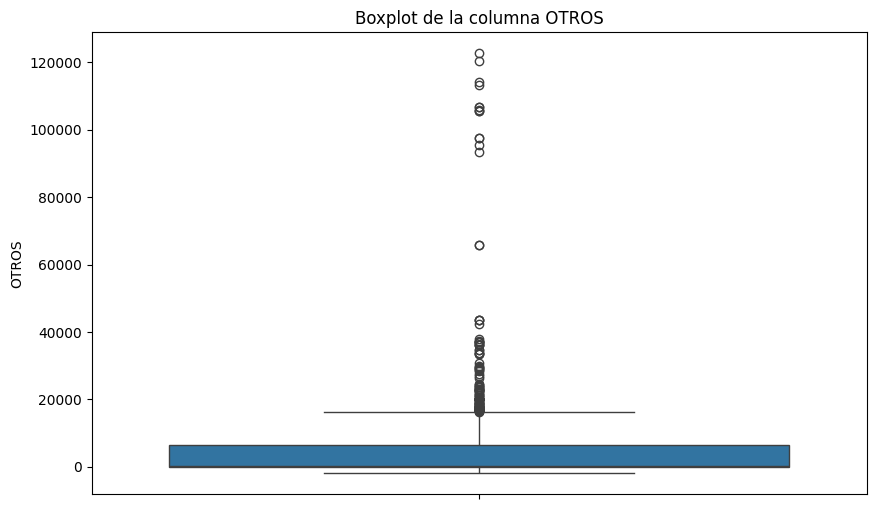

In [16]:
# Crea una copia del DataFrame para trabajar
accesos_por_velocidad = accesos_por_velocidad.copy()

# Genera el boxplot vertical para la columna 'OTROS'
plt.figure(figsize=(10, 6))
sns.boxplot(y=accesos_por_velocidad['OTROS'])
plt.title('Boxplot de la columna OTROS')
plt.ylabel('OTROS')
plt.show()

La caja, que representa el 50% central de los datos, está comprimida en la parte inferior del gráfico, indicando que la mayoría de los valores son bajos.
La mediana está muy cerca de la parte inferior, lo que significa que al menos el 50% de los datos tienen valores muy bajos.
Hay muchos puntos individuales por encima de la caja, representando valores atípicos. Estos se extienden hasta cerca de 120,000 en el eje vertical.
Hay una concentración notable de valores atípicos alrededor de 20,000-40,000, y otro grupo más disperso entre 80,000-120,000.
El rango total de los datos va desde cerca de 0 hasta aproximadamente 120,000, lo que indica una gran variabilidad en esta categoría.
La distribución está fuertemente sesgada hacia la derecha (valores más altos), con la mayoría de los datos concentrados en valores bajos, pero con "colas largas" hacia valores altos.
La categoría "OTROS" contiene principalmente valores bajos, pero con varios casos excepcionales de valores mucho más altos, posiblemente representando situaciones o casos especiales dentro de los datos analizados.

Reemplazo con la mediana

In [17]:
accesos_por_velocidad['OTROS'] = accesos_por_velocidad['OTROS'].fillna(accesos_por_velocidad['OTROS'].median())

# Verifica que no queden valores nulos
print(accesos_por_velocidad.isnull().sum())

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  0
Total                  0
dtype: int64


15) Ingresos

In [38]:
# Muestra de las primeras filas
print("Primeras filas del DataFrame:")
display(ingresos.head())

# Información
print("\nInformación del DataFrame:")
ingresos.info()

# Estadística descriptiva
print("\nEstadísticas descriptivas:")
display(ingresos.describe())

# Valores nulos
valores_nulos = ingresos.isnull().sum()
print("\nValores nulos en cada columna:")
print(valores_nulos[valores_nulos > 0])  

# Duplicados
filas_duplicadas = ingresos.duplicated()
if filas_duplicadas.any():
    print("\nFilas duplicadas encontradas:")
    display(ingresos[filas_duplicadas])
else:
    print("\nNo se encontraron filas duplicadas.")


Primeras filas del DataFrame:


,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2023,4,1.673760e+08,Oct-Dic 2023
1,2023,3,1.331066e+08,Jul-Sept 2023
2,2023,2,1.180603e+08,Jun-Mar 2023
3,2033,1,1.041350e+08,Ene-Mar 2023
4,2022,4,7.244348e+07,Oct-Dic 2022



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        40 non-null     int64  
 1   Trimestre                  40 non-null     int64  
 2   Ingresos (miles de pesos)  40 non-null     float64
 3   Periodo                    40 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB

Estadísticas descriptivas:


,Año,Trimestre,Ingresos (miles de pesos)
count,40.000000,40.000000,4.000000e+01
mean,2018.750000,2.500000,3.281153e+07
std,3.642696,1.132277,3.850304e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.750000,6.817891e+06
50%,2018.500000,2.500000,1.842255e+07
75%,2021.000000,3.250000,3.942974e+07
max,2033.000000,4.000000,1.673760e+08



Valores nulos en cada columna:
Series([], dtype: int64)

No se encontraron filas duplicadas.


## GRÁFICOS

=============
! Aclaración: 
Si bien se generaron boxplots para aquellos dataframes que tenías valores faltantes específicamente, aquí se genera uno para cada dataframe para poder identificar OUTLIERS en todos los dataframes para tener una noción general de outliers en vista del posterior análisis general.

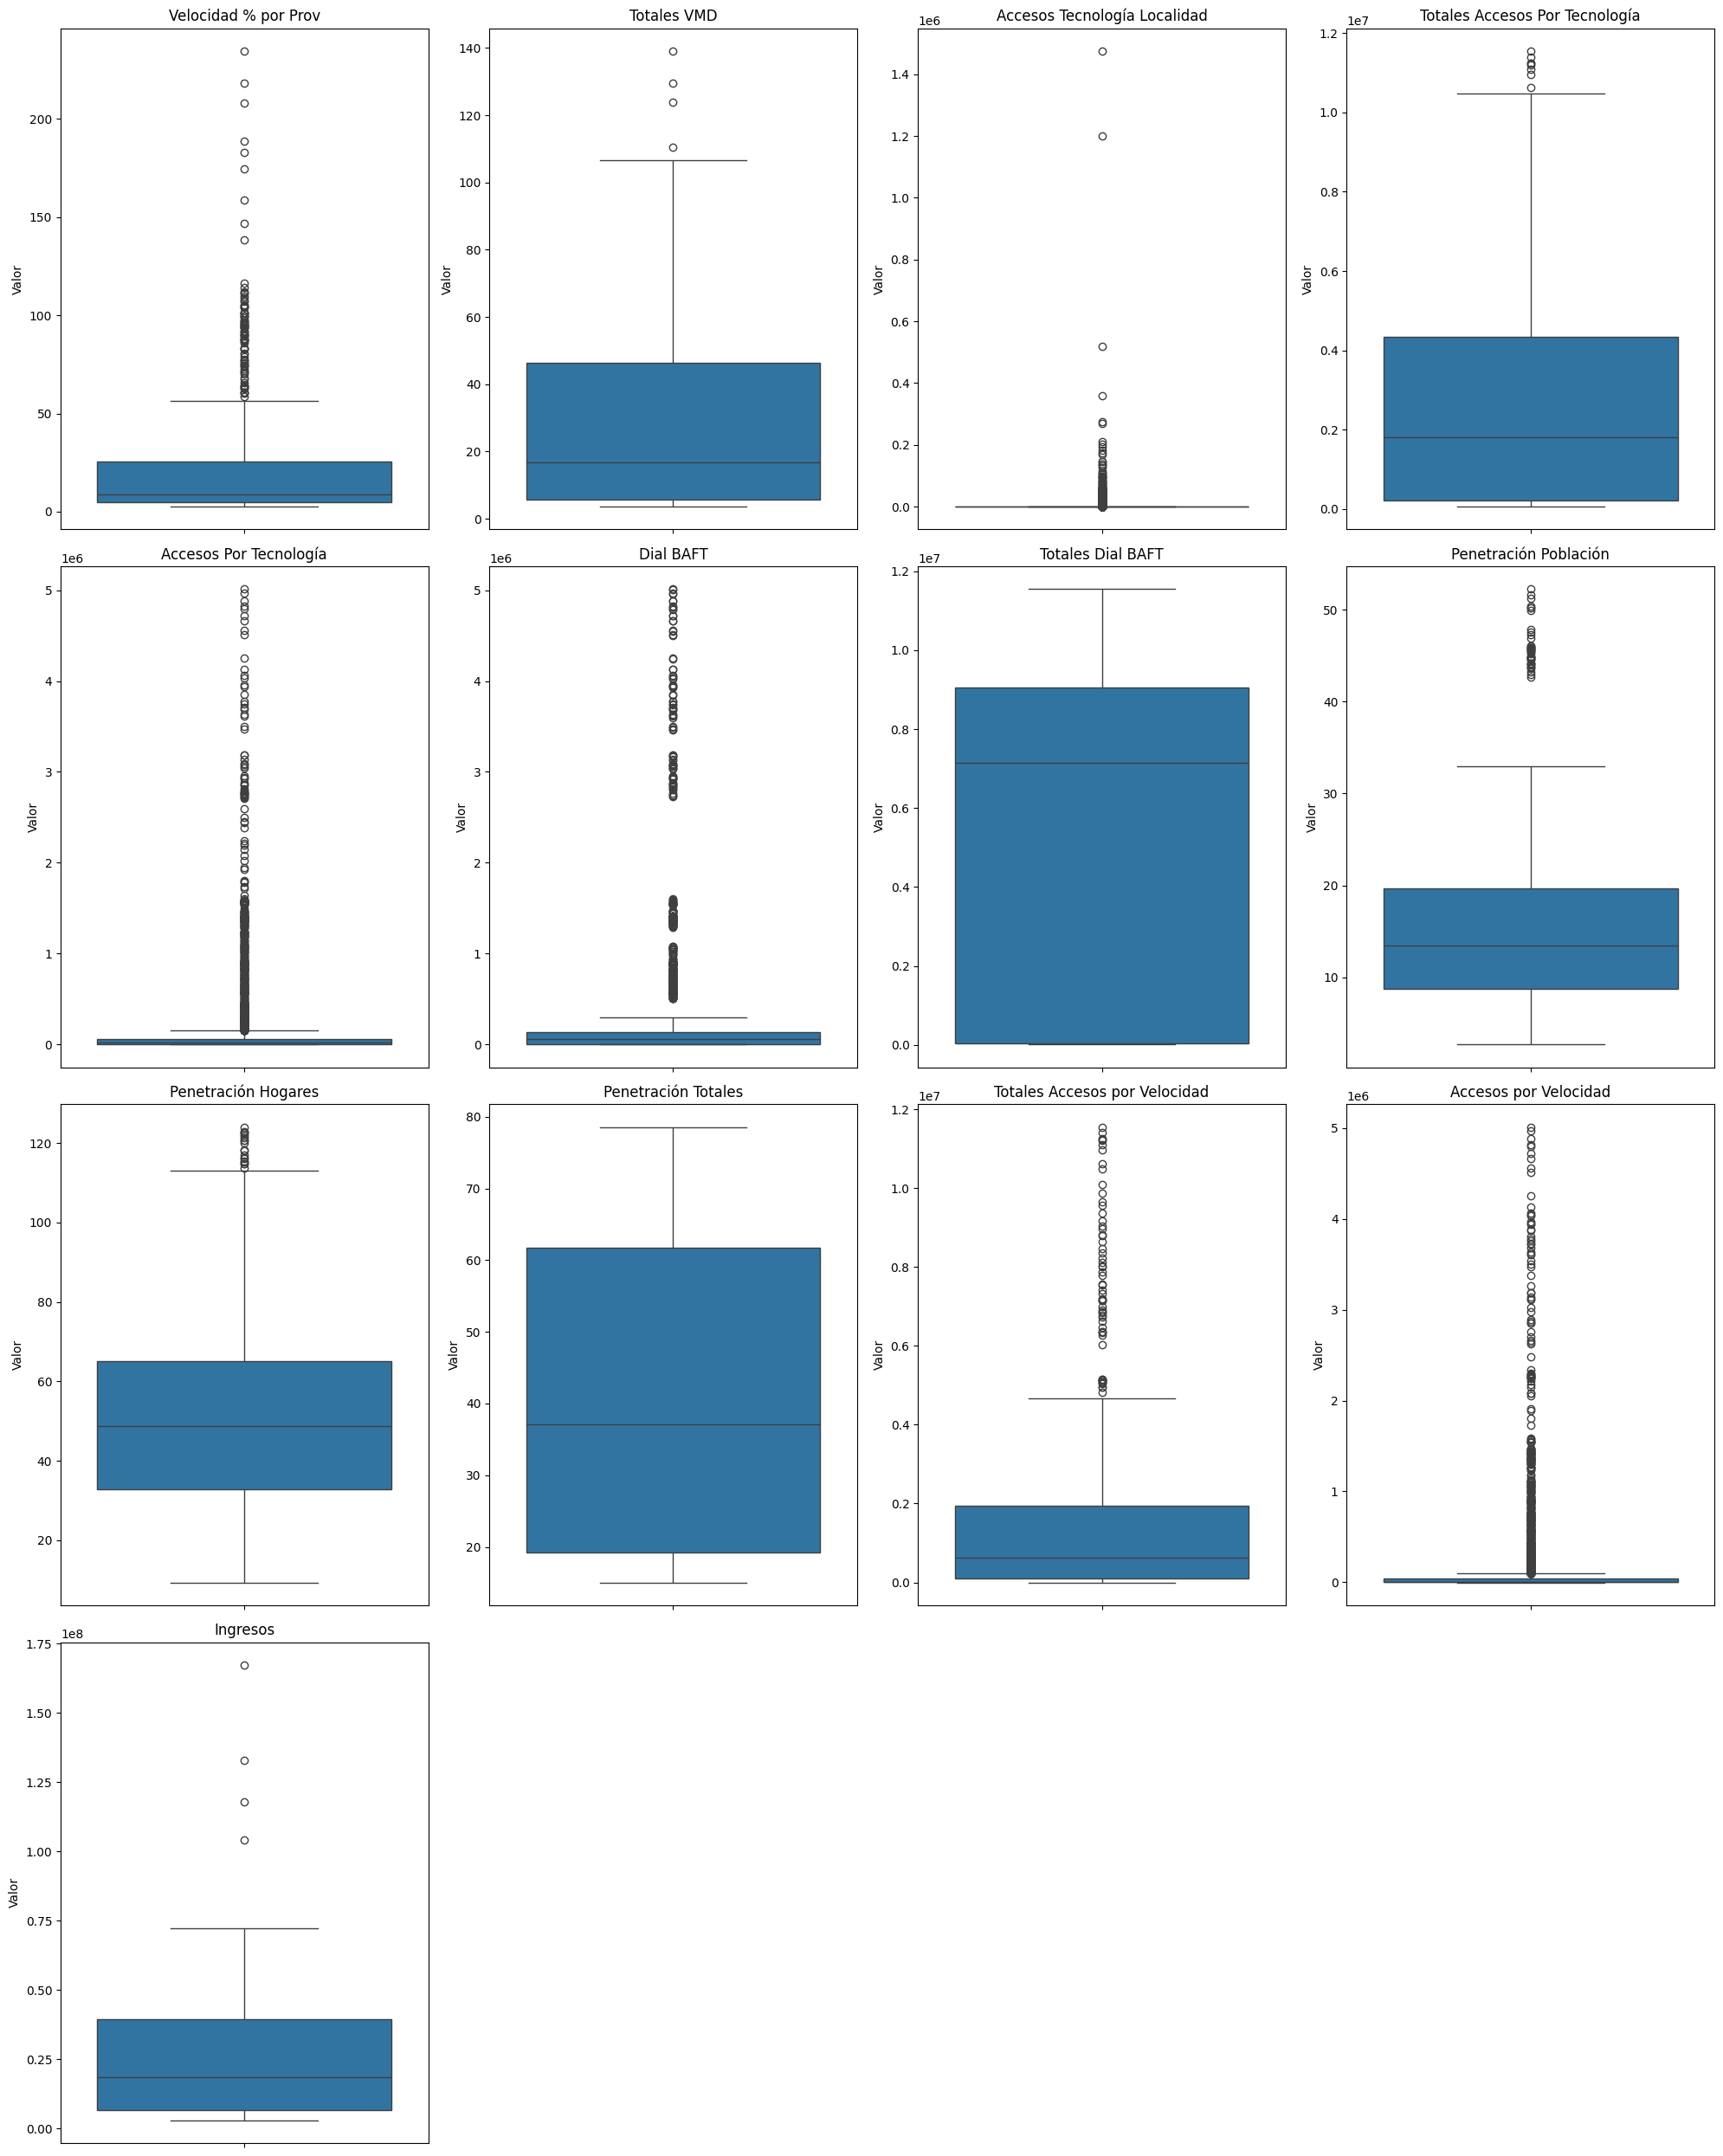

In [55]:
dataframes = {
    'Velocidad % por Prov': velocidad_prom_por_prov,
    'Totales VMD': totales_vmd,
    'Accesos Tecnología Localidad': accesos_tecnologia_localidad,
    'Totales Accesos Por Tecnología': totales_accesos_por_tecnología,
    'Accesos Por Tecnología': accesos_por_tecnología,
    'Dial BAFT': dial_baft,
    'Totales Dial BAFT': totales_dial_baf,
    'Penetración Población': penetracion_poblacion,
    'Penetración Hogares': penetracion_hogares,
    'Penetración Totales': penetracion_totales,
    'Totales Accesos por Velocidad': totales_accesos_por_velocidad,
    'Accesos por Velocidad': accesos_por_velocidad,
    'Ingresos': ingresos
}

plt.figure(figsize=(20, 25))

for i, (name, df) in enumerate(dataframes.items()):
    # Filtra columnas numéricas excluyendo 'Año' y 'Trimestre'
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    numeric_cols = numeric_cols[~numeric_cols.isin(['Año', 'Trimestre'])]  # Excluir columnas específicas
    df_numeric = df[numeric_cols]
    
    # Convierte los DataFrames a formato largo para seaborn
    df_melted = df_numeric.melt(var_name='Variable', value_name='Valor')
    
    plt.subplot(4, 4, i + 1)  # Ajusta la cuadrícula según el número de DataFrames
    sns.boxplot(y='Valor', data=df_melted)
    plt.title(name)
    

plt.tight_layout()
plt.show()


Velocidad por Provincia: Muestra una gran variación, con algunos valores atípicos muy altos.
Totales VMD: Presenta una distribución asimétrica con varios valores atípicos superiores.
Accesos Tecnología Localidad: Muestra una concentración de datos en valores bajos con algunos valores atípicos altos.
Totales Accesos Por Tecnología: Tiene una amplia dispersión con valores atípicos extremos.
Accesos Por Tecnología y Dial BAFT: Ambos muestran patrones similares con muchos valores atípicos altos.
Totales Dial BAFT: Presenta una distribución asimétrica hacia valores más altos.
Penetración Población y Penetración Hogares: Muestran distribuciones más simétricas con algunos valores atípicos.
Penetración Totales: Tiene una distribución amplia con una mediana cerca del centro de la caja.
Totales Accesos por Velocidad y Accesos por Velocidad: Muestran patrones similares con muchos valores atípicos altos.
Ingresos: Presenta una distribución asimétrica con algunos valores atípicos muy altos.
Los gráficos sugieren una gran variabilidad en los datos de acceso a internet entre diferentes regiones o categorías, con frecuentes casos extremos o atípicos, especialmente en métricas relacionadas con accesos y velocidad.

### Se procede a graficar para el EDA aquellos dataframes que fueron considerados relevantes según el análisis y transformaciones anteriores. 

# Velocidad promedio por provincia

In [396]:
velocidad_prom_por_prov.to_csv(r"E:\Repositorios y bases de datos\Henry DS\a_Proyecto individual 2- LABS - Henry\archivos_para_powerbi\velocidad_prom_por_prov.csv", index=False)


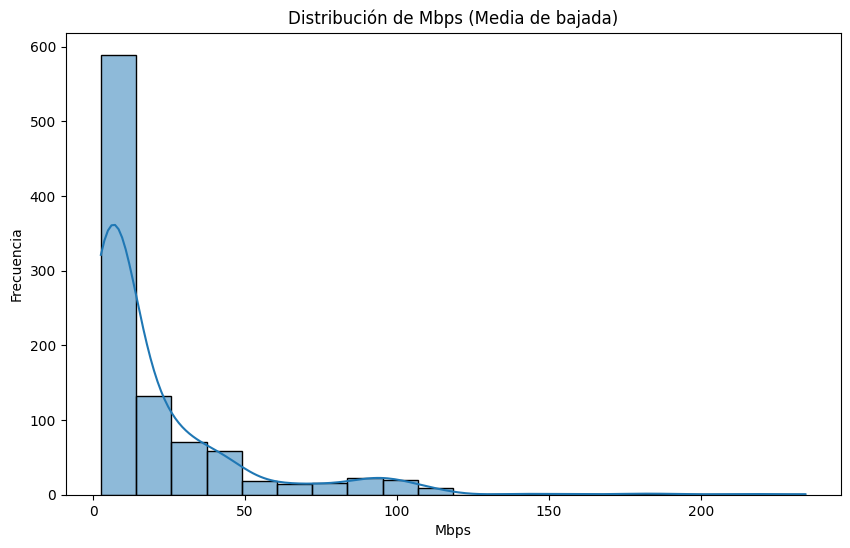

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(velocidad_prom_por_prov['Mbps (Media de bajada)'], bins=20, kde=True)
plt.title('Distribución de Mbps (Media de bajada)')
plt.xlabel('Mbps')
plt.ylabel('Frecuencia')
plt.show()


Ddistribución de velocidades de conexión a internet, específicamente la velocidad media de bajada medida en Mbps (megabits por segundo).
La mayoría de las conexiones se agrupan en el rango de 0-50 Mbps, con el pico más alto en el primer intervalo (0-25 Mbps aproximadamente).
La frecuencia disminuye rápidamente a medida que aumenta la velocidad.
Hay algunas conexiones con velocidades muy altas (200+ Mbps), pero son relativamente pocas.
Existe una amplia gama de velocidades de conexión, desde muy bajas hasta muy altas.
Esta distribución sugiere que, aunque hay opciones de alta velocidad disponibles, la mayoría de los usuarios tienen conexiones de velocidad baja a media. Esto podría reflejar factores como la disponibilidad de infraestructura, costos, o las necesidades variadas de los usuarios.

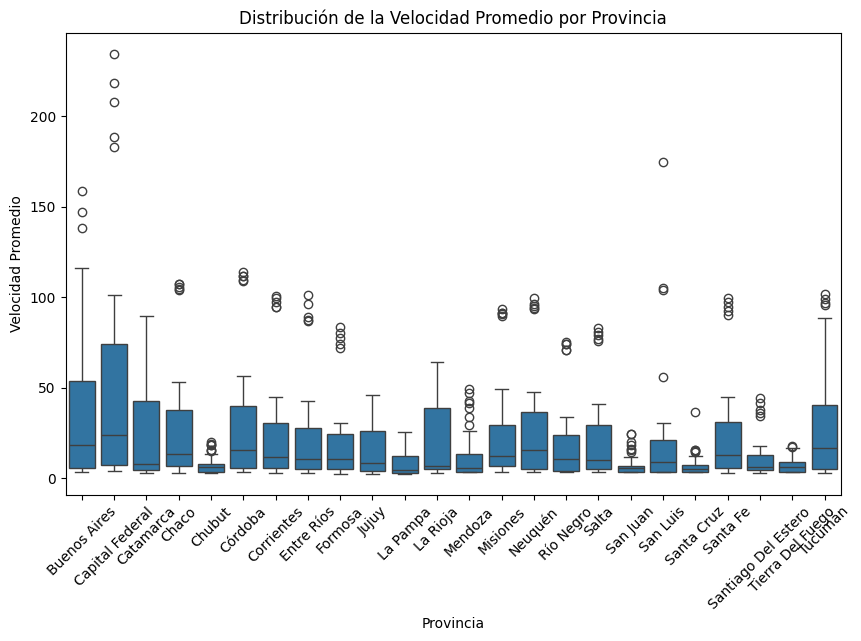

In [43]:
# Crea el gráfico de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x='Provincia', y='Mbps (Media de bajada)', data=velocidad_prom_por_prov)
plt.title('Distribución de la Velocidad Promedio por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Velocidad Promedio')
plt.xticks(rotation=45)
plt.show()

Hay una gran dispersión en las velocidades dentro de cada provincia.
La distribución en la mayoría de las provincias es asimétrica, con una cola larga hacia arriba (velocidades más altas).
Los puntos por encima de las cajas representan velocidades inusualmente altas para esa provincia. No son errores, sino probablemente conexiones de alta velocidad menos comunes.
Las medianas están generalmente cerca de la parte inferior, indicando que la mayoría de las conexiones tienen velocidades relativamente bajas.
Hay variación notable entre provincias. Por ejemplo, Capital Federal tiene la caja más alta y extensa, indicando velocidades generalmente más altas.
Algunos casos como Buenos Aires y Capital Federal tienen puntos muy por encima del resto, posiblemente representando conexiones de fibra óptica o planes empresariales de alta velocidad.
Este patrón sugiere una distribución de velocidades de internet muy desigual, tanto dentro de cada provincia como entre ellas. No es que todo sea un outlier, sino que hay una gran variabilidad en las velocidades de conexión, con la mayoría siendo relativamente bajas pero con algunas conexiones de muy alta velocidad en casi todas las provincias.

barras por provincia (último trimestre 2023)

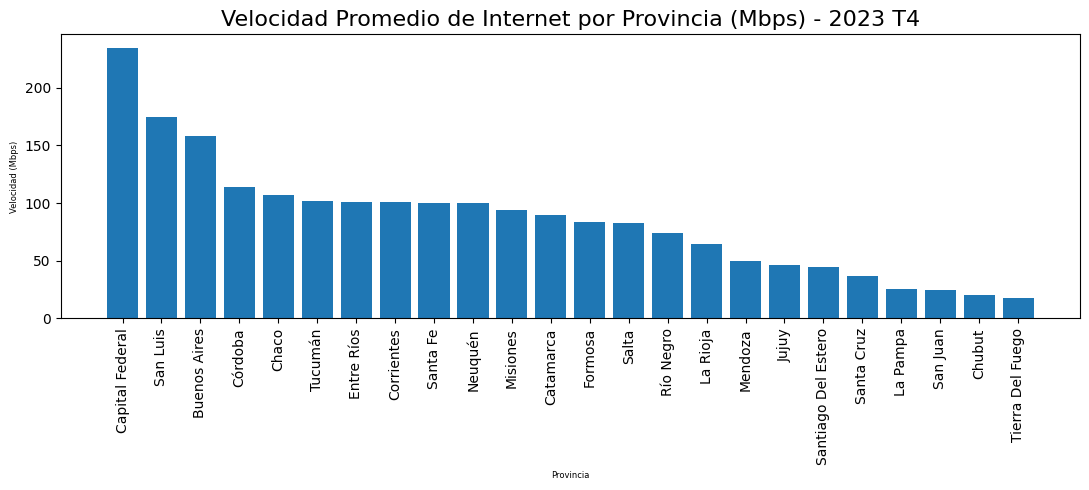

In [68]:

ultimo_trimestre = velocidad_prom_por_prov['Trimestre'].max()
ultimo_anio = velocidad_prom_por_prov['Año'].max()
df_ultimo = velocidad_prom_por_prov[(velocidad_prom_por_prov['Año'] == ultimo_anio) & 
                                    (velocidad_prom_por_prov['Trimestre'] == ultimo_trimestre)]

# Ordena por velocidad de mayor a menor
df_sorted = df_ultimo.sort_values('Mbps (Media de bajada)', ascending=False)

# Crea el gráfico de barras
plt.figure(figsize=(11, 5))
bars = plt.bar(df_sorted['Provincia'], df_sorted['Mbps (Media de bajada)'])

# Personaliza el gráfico
plt.title(f'Velocidad Promedio de Internet por Provincia (Mbps) - {ultimo_anio} T{ultimo_trimestre}', fontsize=16)
plt.xlabel('Provincia', fontsize=6)
plt.ylabel('Velocidad (Mbps)', fontsize=6)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


Existe una gran variación en las velocidades de internet entre las provincias, desde 234.44 Mbps en Capital Federal hasta 17.92 Mbps en Tierra del Fuego.
Capital Federal (CABA) lidera claramente con la velocidad más alta (234.44 Mbps), seguida por San Luis (174.59 Mbps) y Buenos Aires (158.49 Mbps). Esto refleja probablemente una mejor infraestructura y mayor inversión en áreas urbanas densamente pobladas.
Hay una notable brecha entre las provincias más desarrolladas y las menos desarrolladas. Las provincias con mayores recursos o más urbanizadas tienden a tener velocidades más altas.
San Luis destaca como un caso interesante, con la segunda velocidad más alta. Esto podría ser resultado de políticas específicas de desarrollo tecnológico en esa provincia.
Tierra del Fuego, Chubut, San Juan y La Pampa muestran las velocidades más bajas, todas por debajo de 26 Mbps. Esto podría indicar desafíos en la infraestructura de telecomunicaciones en estas regiones.
Se observa una agrupación de provincias con velocidades entre 100 y 115 Mbps (como Córdoba, Chaco, Tucumán, Entre Ríos), lo que podría indicar un estándar medio de conectividad en varias regiones del país.
Las diferencias en velocidad de internet pueden tener implicaciones significativas para el desarrollo económico, educativo y social de las diferentes provincias.
El gráfico resalta dónde podrían ser más necesarias las inversiones en infraestructura de internet para reducir la brecha digital.
Vemos la desigualdad en el acceso a internet de alta velocidad en Argentina, lo que puede ser crucial para la planificación de políticas públicas y estrategias de desarrollo en telecomunicaciones.

comparación con los datos más viejos disponibles y los más nuevos disponibles

In [86]:
# merge
acc_vel_pen_hog = pd.merge(penetracion_hogares, accesos_por_velocidad, on=['Provincia', 'Año', 'Trimestre'], how='inner')

print(acc_vel_pen_hog.head())


    Año  Trimestre        Provincia  Accesos por cada 100 hogares  \
0  2023          3     Buenos Aires                         80.64   
1  2023          3  Capital Federal                        116.40   
2  2023          3        Catamarca                         68.55   
3  2023          3            Chaco                         42.87   
4  2023          3           Chubut                         84.23   

   HASTA 512 kbps  + 512 Kbps - 1 Mbps  + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  \
0         27440.0              24820.0           242010.0            241310.0   
1           516.0               4690.0            28089.0             50899.0   
2            71.0                224.0             3194.0              3893.0   
3           236.0                462.0            14076.0             12874.0   
4           111.0               1470.0            44434.0             30908.0   

   + 10 Mbps - 20 Mbps  + 20 Mbps - 30 Mbps  + 30 Mbps     OTROS      Total  
0             246076

Análisis comparativo en la evolución de la velocidad a lo largo de 10 años, desde 2014 hasta 2023.

El siguiente gráfico tiene escala logarítmica en el eje Y debido a la gran diferencia en velocidades a lo largo de 10 años. Esto es para que podamos ver con mayor claridad la velocidad del año 2014.

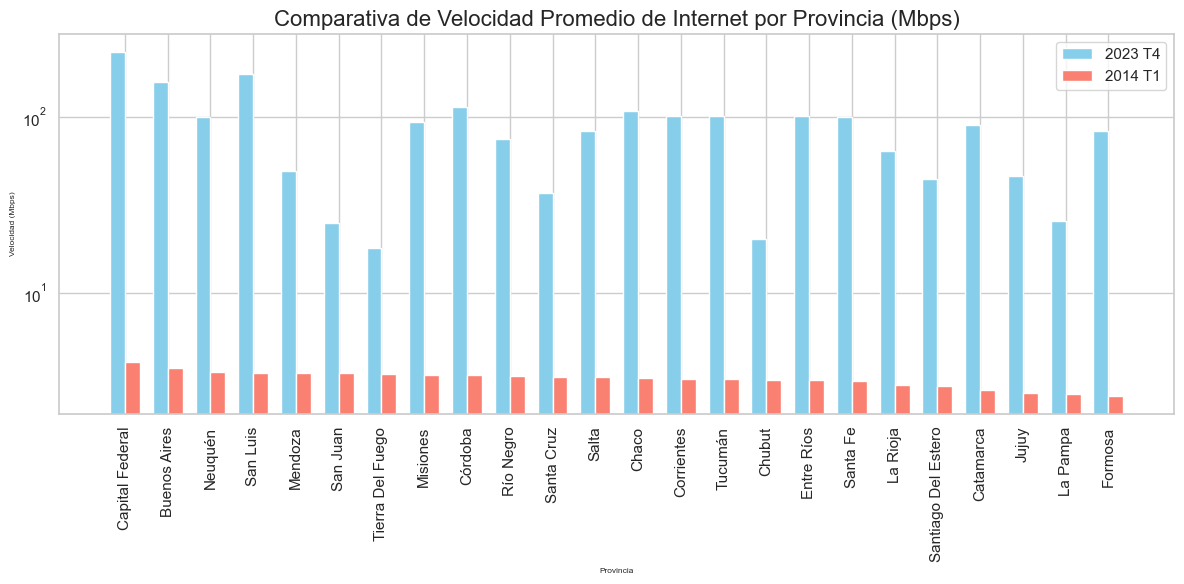

In [92]:
# Filtra para el último trimestre disponible
ultimo_trimestre = velocidad_prom_por_prov['Trimestre'].max()
ultimo_anio = velocidad_prom_por_prov['Año'].max()
df_ultimo = velocidad_prom_por_prov[(velocidad_prom_por_prov['Año'] == ultimo_anio) & 
                                    (velocidad_prom_por_prov['Trimestre'] == ultimo_trimestre)]

# Filtra para el primer trimestre de 2014
trimestre_1 = 1  # Primer trimestre
anio2014 = 2014
df_primero = velocidad_prom_por_prov[(velocidad_prom_por_prov['Año'] == anio2014) & 
(velocidad_prom_por_prov['Trimestre'] == trimestre_1)]

# Combina ambos DataFrames
df_combined = df_ultimo[['Provincia', 'Mbps (Media de bajada)']].rename(columns={'Mbps (Media de bajada)': 'Mbps (2023 T4)'})
df_combined_primero = df_primero[['Provincia', 'Mbps (Media de bajada)']].rename(columns={'Mbps (Media de bajada)': 'Mbps (2014 T1)'})

# Realiza un merge en base a 'Provincia'
df_merged = pd.merge(df_combined, df_combined_primero, on='Provincia', how='outer')

# Ordena por la velocidad de 2014
df_merged_sorted = df_merged.sort_values('Mbps (2014 T1)', ascending=False)

# Crea el gráfico de barras comparativas
bar_width = 0.35  # Ancho de las barras
index = range(len(df_merged_sorted))

plt.figure(figsize=(12, 6))
bars1 = plt.bar(index, df_merged_sorted['Mbps (2023 T4)'], bar_width, label='2023 T4', color='skyblue')
bars2 = plt.bar([i + bar_width for i in index], df_merged_sorted['Mbps (2014 T1)'], bar_width, label='2014 T1', color='salmon')


plt.title(f'Comparativa de Velocidad Promedio de Internet por Provincia (Mbps)', fontsize=16)
plt.xlabel('Provincia', fontsize=6)
plt.ylabel('Velocidad (Mbps)', fontsize=6)
plt.xticks([i + bar_width / 2 for i in index], df_merged_sorted['Provincia'], rotation=90)
plt.legend()

# Aplica escala logarítmica en el eje y
plt.yscale('log')

plt.tight_layout()
plt.show()


El aumento dramático en las velocidades sugiere una transición significativa de tecnologías más antiguas (como ADSL o cable coaxial) a tecnologías de mayor velocidad, probablemente fibra óptica o conexiones de cable de nueva generación. Este cambio tecnológico es evidente en todas las provincias, aunque en diferentes grados.
A pesar del crecimiento general, se observa un aumento en la disparidad de velocidades entre provincias. En 2014, las diferencias eran relativamente pequeñas. Sin embargo, en el último trimestre, la brecha se ha ampliado considerablemente.
Las provincias con grandes centros urbanos (como Capital Federal, Buenos Aires, Córdoba) muestran velocidades mucho más altas, lo que sugiere una implementación más rápida de nuevas tecnologías en áreas metropolitanas.
Las provincias como Chubut, La Pampa y Formosa, aunque han mejorado, parecen rezagadas en comparación con el ritmo de crecimiento de otras regiones.
La variación en el crecimiento podría reflejar desafíos en la implementación de nueva infraestructura en ciertas áreas, posiblemente debido a factores geográficos o económicos.
Esta creciente disparidad en velocidades podría exacerbar la brecha digital entre regiones, afectando el acceso a servicios en línea, educación y oportunidades económicas.

In [ ]:
print(penetracion_hogares)


# Acceso por tecnología

In [421]:
# Limpia la columna 'Año'
df['Año'] = df['Año'].astype(str).str.replace('.0', '', regex=False)  # Eliminar '.0'
df['Año'] = pd.to_numeric(df['Año'], errors='coerce').astype('Int64')  # Convertir a entero

# Limpia la columna 'Trimestre'
df['Trimestre'] = df['Trimestre'].astype(str).str.replace(' *', '', regex=False)  # Eliminar espacios
df['Trimestre'] = df['Trimestre'].str.extract('(\d+)')[0]  # Extraer solo números
df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce').astype('Int64')  # Convertir a entero

# Verifica nuevamente si hay valores nulos
print(df['Año'].isnull().sum())
print(df['Trimestre'].isnull().sum())


df = df.dropna(subset=['Año', 'Trimestre'])
accesos_por_tecnología_power = df


accesos_por_tecnología_power

0
0


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2023,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0
1,2023,4,Capital Federal,58700.0,1198835.0,182520.0,4492.0,29820.0,1474367.0
2,2023,4,Catamarca,6669.0,11016.0,55437.0,1384.0,81.0,74587.0
3,2023,4,Chaco,14000.0,60277.0,62301.0,8404.0,2404.0,147386.0
4,2023,4,Chubut,26306.0,77217.0,26174.0,30543.0,9930.0,170170.0
...,...,...,...,...,...,...,...,...,...
955,2014,1,Santa Cruz,18927.0,100.0,381.0,4092.0,3264.0,26764.0
956,2014,1,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0,506612.0
957,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
958,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0


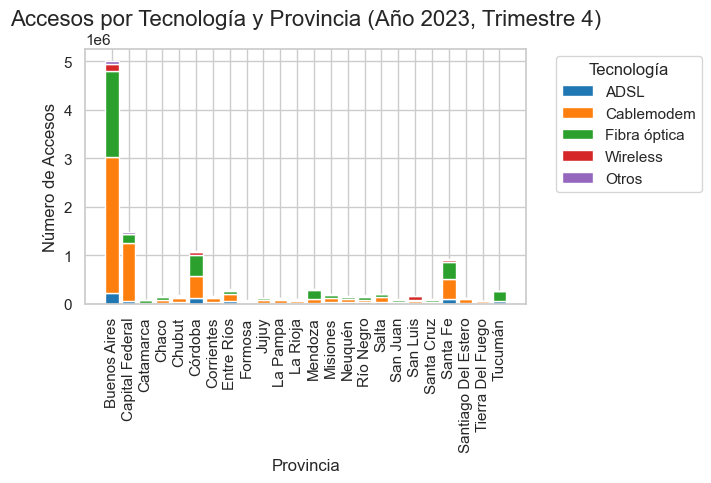

In [405]:
# Convertir 'Año' a numérico
accesos_por_tecnología['Año'] = pd.to_numeric(accesos_por_tecnología['Año'], errors='coerce')

# Filtra el último trimestre
ultimo_trimestre = accesos_por_tecnología['Año'].max()
ultimo_periodo = accesos_por_tecnología[accesos_por_tecnología['Año'] == ultimo_trimestre]['Trimestre'].max()
df_ultimo = accesos_por_tecnología[(accesos_por_tecnología['Año'] == ultimo_trimestre) & 
(accesos_por_tecnología['Trimestre'] == ultimo_periodo)]

# Selecciona las columnas de tecnologías
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

# Crea el gráfico
fig, ax = plt.subplots(figsize=(7, 5))

# Base para las barras apiladas
bottom = np.zeros(len(df_ultimo))

# Colores para cada tecnología
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Crea las barras apiladas
for i, tecnologia in enumerate(tecnologias):
    valores = df_ultimo[tecnologia].values
    ax.bar(df_ultimo['Provincia'], valores, bottom=bottom, label=tecnologia, color=colores[i])
    bottom += valores

# Personaliza el gráfico
ax.set_title(f'Accesos por Tecnología y Provincia (Año {int(ultimo_trimestre)}, Trimestre {ultimo_periodo})', fontsize=16)
ax.set_xlabel('Provincia', fontsize=12)
ax.set_ylabel('Número de Accesos', fontsize=12)
ax.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rota las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=90)


plt.tight_layout()


plt.show()

Hay una gran disparidad en el número de accesos entre provincias. Buenos Aires y Capital Federal dominan claramente en términos de cantidad total de accesos.
Tecnologías predominantes:
Cablemodem (naranja) parece ser la tecnología más común en la mayoría de las provincias.
Fibra óptica (verde) tiene una presencia significativa, especialmente en Buenos Aires y Capital Federal.
ADSL (azul) aún mantiene una porción importante en varias provincias.
Wireless (rojo) y Otros (púrpura) tienen una presencia menor pero visible.

Buenos Aires y Capital Federal tienen un número de accesos mucho mayor que el resto de las provincias, lo que refleja la concentración de población y actividad económica en estas áreas.
La composición de tecnologías varía entre provincias. Algunas muestran una mayor diversificación, mientras que otras dependen más de una o dos tecnologías.
La presencia de fibra óptica es un indicador de inversión en infraestructura moderna. Su distribución desigual sugiere diferentes niveles de desarrollo tecnológico entre provincias.
Las provincias con menos accesos totales y menor diversidad tecnológica probablemente enfrentan mayores desafíos en términos de conectividad y acceso a internet de alta velocidad.
Potencial de crecimiento: Provincias con menor penetración de tecnologías avanzadas como fibra óptica podrían representar oportunidades de crecimiento y mejora en la infraestructura de internet.
Este gráfico complementa el anterior sobre velocidades promedio. Las provincias con mayor presencia de tecnologías avanzadas como fibra óptica tienden a tener velocidades promedio más altas.
La variación en la distribución de tecnologías podría reflejar desafíos geográficos y demográficos únicos de cada provincia.
Hay diferencias regionales en acceso y tecnología, lo cual es crucial para entender la brecha digital en el país y planificar futuras inversiones en infraestructura de internet.

## Penetración por hogares

In [392]:
penetracion_hogares.to_csv(r"E:\Repositorios y bases de datos\Henry DS\a_Proyecto individual 2- LABS - Henry\archivos_para_powerbi\penetracion_hogares.csv", index=False)


C:\Users\Germán\AppData\Local\Temp\ipykernel_20084\4130880222.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=penetracion_hogares, x='Provincia', y='Accesos por cada 100 hogares', palette='viridis')


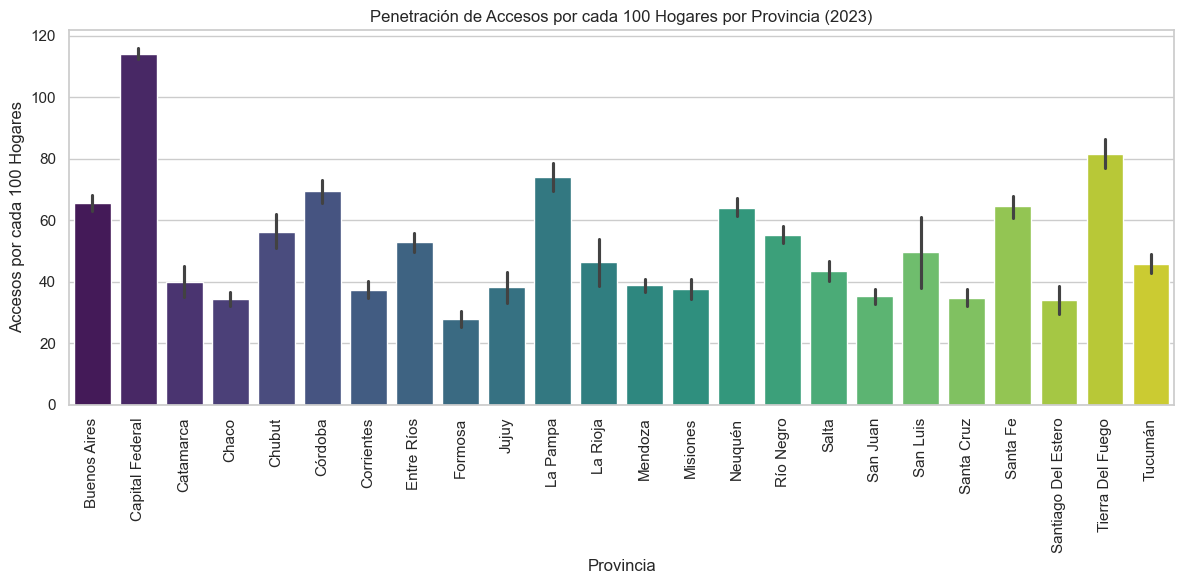

In [199]:
# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=penetracion_hogares, x='Provincia', y='Accesos por cada 100 hogares', palette='viridis')

# Ajusta el gráfico
plt.title('Penetración de Accesos por cada 100 Hogares por Provincia (2023)')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 Hogares')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño


plt.show()


Capital Federal (Ciudad de Buenos Aires) tiene la mayor penetración, con más de 110 accesos por cada 100 hogares, lo que sugiere que algunos hogares tienen múltiples conexiones.
Tierra del Fuego es la segunda provincia con mayor penetración, alcanzando alrededor de 80 accesos por cada 100 hogares.
Buenos Aires, la provincia más poblada, tiene una penetración de aproximadamente 65 accesos por cada 100 hogares.
Las provincias con menor penetración incluyen Formosa, San Luis y Santiago del Estero, con alrededor de 30-40 accesos por cada 100 hogares.
Hay una variación significativa entre las provincias, con algunas como Córdoba, La Pampa y Neuquén mostrando niveles de penetración por encima del promedio.
Las barras de error en cada columna indican cierto grado de incertidumbre o variabilidad en los datos.
En general, se observa una tendencia de mayor penetración en las provincias más urbanizadas y económicamente desarrolladas.


## acceso por velocidad

In [393]:
accesos_por_velocidad.to_csv(r"E:\Repositorios y bases de datos\Henry DS\a_Proyecto individual 2- LABS - Henry\archivos_para_powerbi\accesos_por_velocidad.csv", index=False)


C:\Users\Germán\AppData\Local\Temp\ipykernel_20084\2837696575.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_melt, x='Año', y='Número de conexiones', hue='Categoría', marker='o', ci=None)


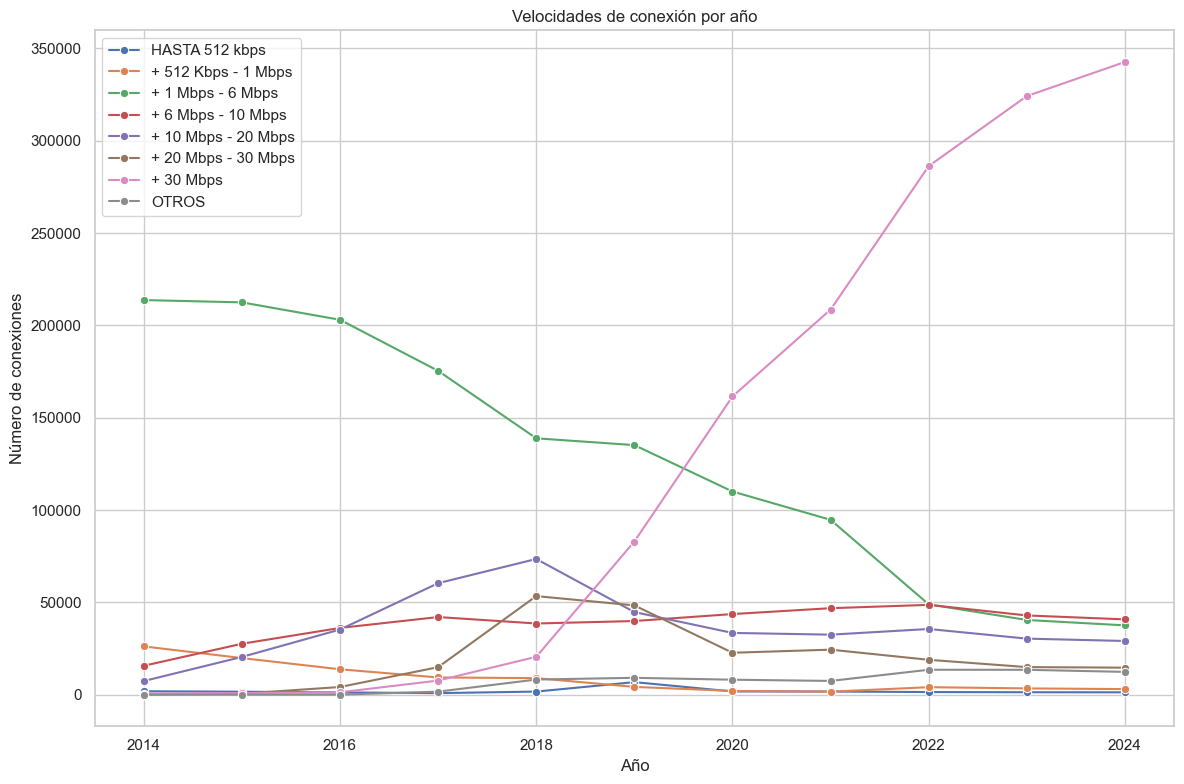

In [191]:
accesos_por_velocidad['Año'] = accesos_por_velocidad['Año'].astype(int)
df_melt = pd.melt(accesos_por_velocidad.drop(columns=['Total']), id_vars=['Año', 'Trimestre'], var_name='Categoría', value_name='Número de conexiones')

# Convierte 'Número de conexiones' a numérico y eliminar NaN
df_melt['Número de conexiones'] = pd.to_numeric(df_melt['Número de conexiones'], errors='coerce')
df_melt.dropna(subset=['Número de conexiones'], inplace=True)

# Trama de líneas para cada categoría de velocidad, sin sombra
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_melt, x='Año', y='Número de conexiones', hue='Categoría', marker='o', ci=None)

# Ajustes de la gráfica
plt.title('Velocidades de conexión por año')
plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.legend(loc='upper left')


plt.tight_layout()
plt.show()


Aumento significativo de conexiones de alta velocidad: La línea rosa, que representa conexiones de más de 30 Mbps, muestra un crecimiento exponencial desde 2018, convirtiéndose en la categoría dominante para 2024.
Disminución de conexiones de velocidad media: La línea verde, que representa conexiones entre 1 Mbps y 6 Mbps, muestra una clara tendencia descendente desde 2014, indicando que los usuarios están migrando a velocidades más altas.
Estabilización de conexiones de baja velocidad: Las conexiones de hasta 512 kbps (línea azul) y entre 512 Kbps y 1 Mbps (línea naranja) han permanecido relativamente estables, aunque con una ligera tendencia a la baja.
Comportamiento variable de velocidades intermedias: Las categorías entre 6 Mbps y 30 Mbps muestran fluctuaciones a lo largo de los años, pero generalmente han mantenido niveles más bajos que las categorías de mayor y menor velocidad.
Tendencia general hacia velocidades más altas: El gráfico muestra claramente una transición de los usuarios hacia conexiones de mayor velocidad a lo largo del tiempo, con un punto de inflexión notable alrededor de 2018-2020.
Proyección futura: Para 2024, se proyecta que las conexiones de más de 30 Mbps serán ampliamente predominantes, mientras que las demás categorías se habrán reducido significativamente.


## Ingresos

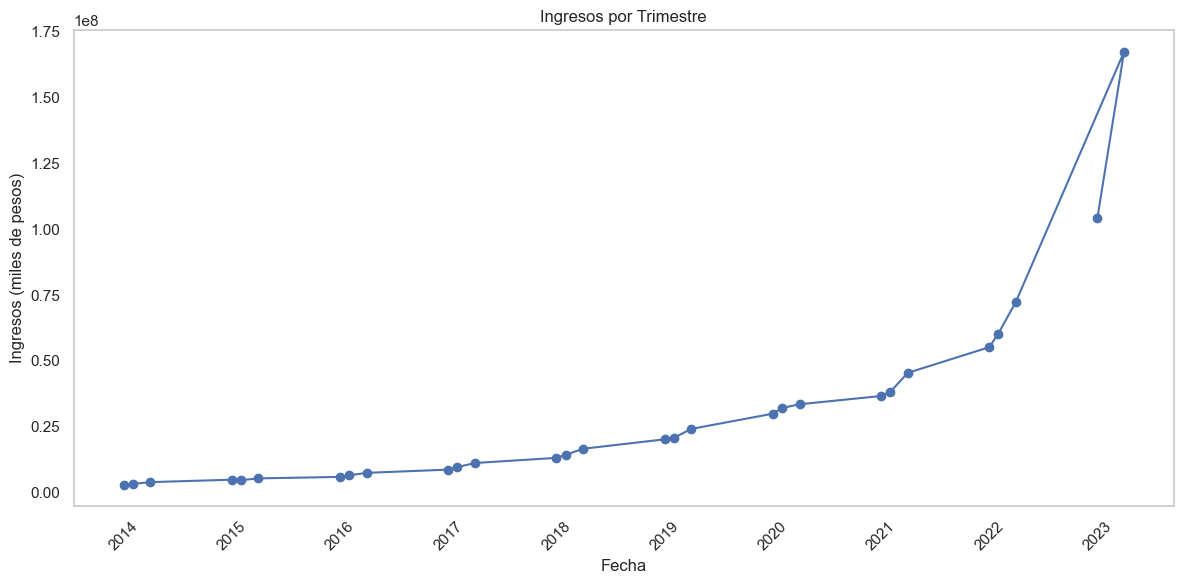

In [167]:
# Reemplaza el año 2033 por 2023
ingresos['Año'] = ingresos['Año'].replace(2033, 2023)

# Verifica y maneja valores NaN en 'Trimestre'
ingresos['Trimestre'] = pd.to_numeric(ingresos['Trimestre'], errors='coerce')  # Convierte a numérico, reemplaza errores con NaN
ingresos.dropna(subset=['Trimestre'], inplace=True)  # Elimina filas con NaN en 'Trimestre'

# Trimestres enteros
ingresos['Trimestre'] = ingresos['Trimestre'].astype(int)

# Crea una columna de fecha a partir de Año y Trimestre
ingresos['Fecha'] = pd.to_datetime(ingresos['Año'].astype(str) + '-' + ingresos['Trimestre'].astype(str) + '-1', format='%Y-%m-%d')


plt.figure(figsize=(12, 6))
plt.plot(ingresos['Fecha'], ingresos['Ingresos (miles de pesos)'], marker='o', linestyle='-', color='b')
plt.title('Ingresos por Trimestre')
plt.xlabel('Fecha')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


Se observa un crecimiento constante de los ingresos a lo largo del tiempo, con una aceleración notable en los últimos años.
Inicio lento: Entre 2014 y 2017, el crecimiento fue muy gradual, con ingresos trimestrales por debajo de los 25 millones de pesos.
Crecimiento moderado: De 2018 a 2020, se aprecia un aumento más pronunciado pero aún moderado, llegando a cerca de 50 millones de pesos por trimestre.
Aceleración: A partir de 2021, el crecimiento se acelera significativamente.
Auge reciente: En 2022 y 2023, se observa un crecimiento exponencial, con los ingresos trimestrales superando los 150 millones de pesos en el último punto graficado.
Variabilidad: Se pueden apreciar algunas fluctuaciones entre trimestres, especialmente en los últimos años, lo que podría indicar cierta estacionalidad en los ingresos.
Escala: El eje Y está en escala de 1e8, lo que significa que cada unidad representa 100 millones de pesos.
Este patrón sugiere que la empresa ha experimentado un crecimiento sustancial, especialmente en los últimos años, posiblemente debido a expansión del negocio, nuevos productos o servicios, o mejoras en la estrategia de ventas.

===========================================================================

## KPI obligatorio

In [48]:
# Inicializa una lista para almacenar resultados
resultados_totales = []

# Itera sobre los años y trimestres
for anio in range(2014, 2024):  # Desde 2014 hasta 2023
    for trimestre in range(1, 5):  # Desde el trimestre 1 hasta el 4
        if trimestre == 1:  # Si es el primer trimestre, comparar con el cuarto trimestre del año anterior
            anio_anterior = anio - 1
            trimestre_anterior = 4
        else:  # Para los demás trimestres, comparar con el trimestre anterior
            anio_anterior = anio
            trimestre_anterior = trimestre - 1
        
        # Filtra datos para el trimestre actual y el anterior
        df_actual = penetracion_hogares[(penetracion_hogares['Año'] == anio) & (penetracion_hogares['Trimestre'] == trimestre)]
        df_anterior = penetracion_hogares[(penetracion_hogares['Año'] == anio_anterior) & (penetracion_hogares['Trimestre'] == trimestre_anterior)]
        
        # Solo realiza el merge si hay datos del trimestre anterior
        if not df_anterior.empty:
            # Unir los dos DataFrames en base a la provincia
            df_merged = df_actual.merge(df_anterior, on='Provincia', suffixes=('_actual', '_anterior'))
            
            # Calcula el porcentaje de crecimiento
            df_merged['Crecimiento (%)'] = ((df_merged['Accesos por cada 100 hogares_actual'] - df_merged['Accesos por cada 100 hogares_anterior']) / df_merged['Accesos por cada 100 hogares_anterior']) * 100
            
            # Agrega el año y trimestre del trimestre actual
            df_merged['Año'] = anio
            df_merged['Trimestre'] = trimestre
            
            # Agrega los resultados a la lista
            resultados_totales.append(df_merged[['Provincia', 'Año', 'Trimestre', 'Accesos por cada 100 hogares_actual', 'Accesos por cada 100 hogares_anterior', 'Crecimiento (%)']])

# Concatena todos los resultados en un solo DataFrame
resultados_finales = pd.concat(resultados_totales, ignore_index=True)


resultados_finales


,Provincia,Año,Trimestre,Accesos por cada 100 hogares_actual,Accesos por cada 100 hogares_anterior,Crecimiento (%)
0,Buenos Aires,2014,2,55.061417,54.570073,0.900391
1,Capital Federal,2014,2,113.143352,112.254123,0.792158
2,Catamarca,2014,2,24.703119,24.251751,1.861175
3,Chaco,2014,2,20.957996,20.718539,1.155764
4,Chubut,2014,2,41.410210,41.235218,0.424374
...,...,...,...,...,...,...
931,Santa Cruz,2023,4,73.750000,40.890000,80.361947
932,Santa Fe,2023,4,79.750000,79.090000,0.834492
933,Santiago Del Estero,2023,4,49.080000,48.670000,0.842408
934,Tierra Del Fuego,2023,4,110.490000,105.950000,4.285040


In [49]:
resultados_finales.to_excel(r"E:\Repositorios y bases de datos\Henry DS\a_Proyecto individual 2- LABS - Henry\archivos_para_powerbi\resultado_2_porciento_kpi_1.xlsx", index=False) 

## KPI 2

Promedio Mbps (por provincia, por año) = suma de Mbps en el año / número de registros en el año. 

In [50]:

# Calcula el promedio de Mbps por provincia
promedios = velocidad_prom_por_prov.groupby('Provincia')['Mbps (Media de bajada)'].mean().reset_index()
promedios.columns = ['Provincia', 'Promedio Mbps (KPI)']

# DataFrame original con los promedios
resultado_promedio = pd.merge(velocidad_prom_por_prov, promedios, on='Provincia', suffixes=('', '_Promedio'))

# Agrega columna para verificar cumplimiento del objetivo
resultado_promedio['Cumple Objetivo'] = resultado_promedio['Promedio Mbps (KPI)'].apply(lambda x: 'Cumple' if x >= 50 else 'No cumple')


resultado_promedio


,Año,Trimestre,Provincia,Mbps (Media de bajada),Promedio Mbps (KPI),Cumple Objetivo
0,2023,4,Buenos Aires,158.490000,38.288382,No cumple
1,2023,4,Capital Federal,234.440000,54.924554,Cumple
2,2023,4,Catamarca,89.400000,26.607139,No cumple
3,2023,4,Chaco,107.140000,29.216435,No cumple
4,2023,4,Chubut,20.290000,7.549799,No cumple
...,...,...,...,...,...,...
955,2014,1,Santa Cruz,3.315991,7.291459,No cumple
956,2014,1,Santa Fe,3.147407,25.687883,No cumple
957,2014,1,Santiago Del Estero,2.949472,11.519267,No cumple
958,2014,1,Tierra Del Fuego,3.446888,7.297974,No cumple


In [381]:
resultado_promedio.to_csv(r"E:\Repositorios y bases de datos\Henry DS\a_Proyecto individual 2- LABS - Henry\archivos_para_powerbi\resultado_penetracion_prom_kpi_2.csv", index=False)


## KPI 3

Crecimiento = (Accesos por cada 100 hogares en el trimestre  - Accesos por cada 100 hogares en el trimestre) \ Accesos por cada 100 hogares en el trimestre *100

In [395]:
penetracion_poblacion.to_csv(r"E:\Repositorios y bases de datos\Henry DS\a_Proyecto individual 2- LABS - Henry\archivos_para_powerbi\penetracion_poblacion.csv", index=False)


In [52]:

penetracion_poblacion.sort_values(by=['Provincia', 'Año'], inplace=True)

# Calcula el crecimiento de accesos a Internet
penetracion_poblacion['Crecimiento Accesos (KPI)'] = (
    penetracion_poblacion.groupby('Provincia')['Accesos por cada 100 hab']
    .pct_change() * 100
)

# Filtra para ver el crecimiento
resultado_penetracion = penetracion_poblacion[['Año', 'Provincia', 'Accesos por cada 100 hab', 'Crecimiento Accesos (KPI)']]


resultado_penetracion


,Año,Provincia,Accesos por cada 100 hab,Crecimiento Accesos (KPI)
864,2014,Buenos Aires,17.014763,NaN
888,2014,Buenos Aires,17.262998,1.458939
912,2014,Buenos Aires,16.794925,-2.711424
936,2014,Buenos Aires,16.692346,-0.610776
768,2015,Buenos Aires,17.683349,5.936870
...,...,...,...,...
191,2022,Tucumán,14.215533,-3.239460
23,2023,Tucumán,15.120000,6.362524
47,2023,Tucumán,15.170000,0.330688
71,2023,Tucumán,15.050000,-0.791035


In [53]:
resultado_penetracion.to_csv(r"E:\Repositorios y bases de datos\Henry DS\a_Proyecto individual 2- LABS - Henry\archivos_para_powerbi\resultado_penetracion_kpi_3.csv", index=False)
